## Loading, Cleaning, Displaying Data 


For this project, I'm planning to explore data from the FTA (Federal Transit Administration). The dataset I found contains monthly public transit ridership and service data for various U.S. transit agencies and also covers metrics like passenger trips, operating expenses, and fare revenue.

Link: https://www.transit.dot.gov/ntd/data-product/monthly-module-adjusted-data-release

Some of the variables are as follows:



Agency: Name of the transit agency.

Mode: Mode of transportation (e.g., Bus, Rail, Ferry).

Organization Type: Type of organization (e.g., Local Government, Private).

UZA Population: Urbanized area population.

Service Area Population: Number of people served.

Passenger Miles FY: Total miles traveled by passengers.

Unlinked Passenger Trips FY: Number of trips taken.

Fares FY: Total fare revenue collected.

Operating Expenses FY: Cost spent in upkeep and running the transit system.

Avg Cost Per Trip FY: Average expense per trip.

Avg Fares Per Trip FY: Average fare paid per trip.


There are several factors that influence ridership patterns, but many assume fare prices to be sole factor with the most impact. This assumption ended up creating a common myth , causing many to believe that increase in fare prices tends to lower usage of public transportation. 
The aim of the analysis is to challenge this belief while trying to show that along with fare prices, various factors such as type of service,  the size of service area and even economic conditions all play a role in shaping travel behavior. 

Hypothesis:

Null Hypothesis (H₀): Ridership is not significantly affected by fare prices and other factors

Alternative Hypothesis (H₁):Ridership is affected by fare prices along with other factors.


Who is the intended audience ?
This analysis could potentially help professionals working in transportation
infrastructure and economics by providing a better understanding of the
complex factors that influence public transportation ridership. With the
intention of demonstrating that fare prices alone do not dictate public
transportation usage, the analysis offers a unique perspective aimed at
challenging oversimplified assumptions and supporting data-driven
strategies to improve transit systems and ensure sustainability in
transportation planning

In [1]:
#Loading the libraries:
library(ggplot2)
library(GGally)
library(data.table)
library(randomForest)
library(caret)
library(RColorBrewer)
library(tidyverse)
library(car)
library(dplyr)
library(MASS)
library(gridExtra)
library(caTools)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: lattice

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()       masks data.table::between()
✖ dplyr::combine()       masks randomForest::combine()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::first()         masks data.table::first()
✖ dplyr::lag()           masks stats::lag()
✖ dplyr::last()          masks data.table::last()
✖ purrr::lift()          masks caret::lift()
✖ randomForest::margin() masks ggplot2::margin()
✖ purrr::transpo

In [2]:
#Load the dataset
df <- read.csv("December 2024 Complete Monthly Ridership.csv")
head(df)

,NTD.ID,Legacy.NTD.ID,Agency,Mode,TOS,X3.Mode,Mode.Type.of.Service.Status,Reporter.Type,Organization.Type,HQ.City,⋯,Last.Closed.Report.Year,Last.Closed.FY.End.Month,Last.Closed.FY.End.Year,Passenger.Miles.FY,Unlinked.Passenger.Trips.FY,Avg.Trip.Length.FY,Fares.FY,Operating.Expenses.FY,Avg.Cost.Per.Trip.FY,Avg.Fares.Per.Trip.FY
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,0001,King County,DR,PT,Bus,Active,Full Reporter,"City, County or Local Government Unit or Department of Transportation",SEATTLE,⋯,2023,12,2023,"6,470,644","888,663",7,"$816,892.00","$72,095,003.00",$81.13,$0.92
2,1,0001,King County,DR,TX,Bus,Active,Full Reporter,"City, County or Local Government Unit or Department of Transportation",SEATTLE,⋯,2023,12,2023,"1,509,526","121,496",12,"$105,605.00","$5,658,724.00",$46.58,$0.87
3,1,0001,King County,FB,DO,Ferry,Active,Full Reporter,"City, County or Local Government Unit or Department of Transportation",SEATTLE,⋯,2023,12,2023,"1,479,694","399,687",4,"$1,493,280.00","$8,625,721.00",$21.58,$3.74
4,1,0001,King County,LR,DO,Rail,Inactive,Full Reporter,"City, County or Local Government Unit or Department of Transportation",SEATTLE,⋯,2011,12,2011,"471,587","520,933",1,"$288,470.00","$2,281,393.00",$4.38,$0.55
5,1,0001,King County,MB,DO,Bus,Active,Full Reporter,"City, County or Local Government Unit or Department of Transportation",SEATTLE,⋯,2023,12,2023,"244,710,079","63,485,248",4,"$60,386,305.00","$710,359,423.00",$11.19,$0.95
6,1,0001,King County,MB,PT,Bus,Active,Full Reporter,"City, County or Local Government Unit or Department of Transportation",SEATTLE,⋯,2023,12,2023,"2,376,398","623,887",4,"$341,551.00","$15,507,155.00",$24.86,$0.55


In [3]:
#Displaying the structure of the data:
str(df)

'data.frame':	2303 obs. of  27 variables:
 $ NTD.ID                     : int  1 1 1 1 1 1 1 1 1 2 ...
 $ Legacy.NTD.ID              : chr  "0001" "0001" "0001" "0001" ...
 $ Agency                     : chr  "King County" "King County" "King County" "King County" ...
 $ Mode                       : chr  "DR" "DR" "FB" "LR" ...
 $ TOS                        : chr  "PT" "TX" "DO" "DO" ...
 $ X3.Mode                    : chr  "Bus" "Bus" "Ferry" "Rail" ...
 $ Mode.Type.of.Service.Status: chr  "Active" "Active" "Active" "Inactive" ...
 $ Reporter.Type              : chr  "Full Reporter" "Full Reporter" "Full Reporter" "Full Reporter" ...
 $ Organization.Type          : chr  "City, County or Local Government Unit or Department of Transportation" "City, County or Local Government Unit or Department of Transportation" "City, County or Local Government Unit or Department of Transportation" "City, County or Local Government Unit or Department of Transportation" ...
 $ HQ.City                  

There a few variables that are of not right data type, especially the last six variables. First I will remove the variables that I wont need, after which I shall start data type conversion. 

In [4]:
#Removing variables that are not needed:
re_cols = c("NTD.ID","Legacy.NTD.ID","Mode","Mode.Type.of.Service.Status","Reporter.Type", "UACE.CD","UZA.Name","Last.Closed.Report.Year","Last.Closed.FY.End.Month", "Last.Closed.FY.End.Year", "UZA.SQ.Miles")

df <- df[, !names(df) %in% re_cols]
#head(df)

In [5]:
#Coverting appropriate char variables into numerical variables:

char_cols <- c("Passenger.Miles.FY", "Unlinked.Passenger.Trips.FY", 
                  "Fares.FY", "Operating.Expenses.FY", 
                  "Avg.Cost.Per.Trip.FY", "Avg.Fares.Per.Trip.FY")

clean_numeric <- function(x) {
  as.numeric(gsub("[\\$,]", "", x))
}

df[char_cols] <- lapply(df[char_cols], clean_numeric)
df$UZA.Population <- as.numeric(gsub(",", "", df$UZA.Population))
df$Service.Area.Population <- as.numeric(gsub(",", "", df$Service.Area.Population))
df$Service.Area.SQ.Miles <- as.numeric(gsub(",", "", df$Service.Area.SQ.Miles))
#str(df)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [6]:
# Convert categorical columns to factors:
categorical_cols <- c( "Agency", "X3.Mode", "TOS", 
                      "Organization.Type", "HQ.City", "HQ.State")

df[categorical_cols] <- lapply(df[categorical_cols], as.factor)
#str(df)

In [7]:
#Checking for NA values and removing them from the dataset:
print("Before Removal of NA values:")
dim(df)
colSums(is.na(df))
df <- df[complete.cases(df[, c("UZA.Population", "Service.Area.Population", "Service.Area.SQ.Miles",
                                "Passenger.Miles.FY", "Unlinked.Passenger.Trips.FY", "Avg.Trip.Length.FY",
                                "Fares.FY", "Operating.Expenses.FY", "Avg.Cost.Per.Trip.FY", "Avg.Fares.Per.Trip.FY")]), ]

print("After Removal of NA values:")
dim(df)

[1] "Before Removal of NA values:"


[1] 2303   16

Agency                         TOS 
                          0                           0 
                    X3.Mode           Organization.Type 
                          0                           0 
                    HQ.City                    HQ.State 
                          0                           0 
             UZA.Population     Service.Area.Population 
                          6                          52 
      Service.Area.SQ.Miles          Passenger.Miles.FY 
                         52                         403 
Unlinked.Passenger.Trips.FY          Avg.Trip.Length.FY 
                        403                         403 
                   Fares.FY       Operating.Expenses.FY 
                        398                         384 
       Avg.Cost.Per.Trip.FY       Avg.Fares.Per.Trip.FY 
                        403                         403

[1] "After Removal of NA values:"


[1] 1860   16

In [8]:
#Changing the name of the variables:
oldname <- c("X3.Mode","Organization.Type", "HQ.City","HQ.State", "UZA.Population",
             "Service.Area.Population","Service.Area.SQ.Miles","Passenger.Miles.FY","Unlinked.Passenger.Trips.FY",
             "Avg.Trip.Length.FY","Fares.FY", "Operating.Expenses.FY", "Avg.Cost.Per.Trip.FY", "Avg.Fares.Per.Trip.FY")
newname <- c( "Mode", "Org_Type", "City", "State",  
             "UZA_Pop", "Service_Pop", "Service_Area_SQMI", "Passenger_Miles",  
             "Passenger_Trips", "Avg_Trip_Length", "Fares", "Operating_Expenses",  
             "Cost_Per_Trip", "Fare_Per_Trip")
setnames(df,oldname,newname)

In [9]:
str(df)

'data.frame':	1860 obs. of  16 variables:
 $ Agency            : Factor w/ 822 levels "2Plus Partners in Transportation, Inc",..: 448 448 448 448 448 448 448 448 448 704 ...
 $ TOS               : Factor w/ 4 levels "DO","PT","TN",..: 2 4 1 1 1 2 1 1 1 1 ...
 $ Mode              : Factor w/ 4 levels "Bus","Ferry",..: 1 1 2 4 1 1 4 1 1 1 ...
 $ Org_Type          : Factor w/ 20 levels "?","Area Agency on Aging",..: 3 3 3 3 3 3 3 3 3 5 ...
 $ City              : Factor w/ 637 levels " Norman","ABILENE",..: 522 522 522 522 522 522 522 522 522 535 ...
 $ State             : Factor w/ 53 levels "AK","AL","AR",..: 50 50 50 50 50 50 50 50 50 50 ...
 $ UZA_Pop           : num  3544011 3544011 3544011 3544011 3544011 ...
 $ Service_Pop       : num  2347800 2347800 2347800 2347800 2347800 ...
 $ Service_Area_SQMI : num  2134 2134 2134 2134 2134 ...
 $ Passenger_Miles   : num  6.47e+06 1.51e+06 1.48e+06 4.72e+05 2.45e+08 ...
 $ Passenger_Trips   : num  888663 121496 399687 520933 63485248 ...
 $ A

In [10]:
#Normalizing the data to improve normality and stabilize variance in key factors:
num_cols <- sapply(df, is.numeric)

# Log transformation was used instead of Min-Max as it greatly improves visualization as well.
log_transform <- function(x) {
  return(log1p(x)) } 

df[num_cols] <- lapply(df[num_cols], log_transform)

Since State is a factor variable with 53 levels , it will be very difficult to do any sort of meaning full analysis and as such to work around that I will be grouping it into 5 categories. Namely as North East, South East, Mid West, West and Other

In [11]:
neast_states <- c("CT", "DE", "ME", "MD", "MA", "NH", "NJ", "NY", "PA", "RI", "VT")
seast_states <- c("AL", "AR", "DC", "FL", "GA", "KY", "LA", "MS", "NC", "SC", "TN", "TX", "VA", "WV")
midwest_states <- c("IL", "IN", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI")
west_states <- c("AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY")

df$Region <- case_when(
  df$State %in% neast_states ~ "NorthEast",
  df$State %in% seast_states ~ "SouthEast",
  df$State %in% midwest_states ~ "Midwest",
  df$State %in% west_states ~ "West",
  TRUE ~ "Other"
)

A similar situation was encounterd with Org_type...

In [12]:
org_type_counts <- table(df$Org_Type)
minor_orgs <- names(org_type_counts[org_type_counts < 10])
df$Org_Type <- ifelse(df$Org_Type %in% minor_orgs, "Other", df$Org_Type)

In [13]:
#Converting them into factors:
df$Org_Type <- as.factor(df$Org_Type)
df$Region <- as.factor(df$Region)

Since Grouping is difficult for both Agency and City, I can try to employ frequency encoding, replacing the categorical value with the number of times it appears in the dataset. Doing so can also provide me the opportunity to check the correlation with Passenger trips.

In [14]:
#City
city_counts <- table(df$City)
df$City_Freq <- city_counts[df$City]
#Agency
agency_counts <- table(df$Agency)
df$Agency_Freq <- agency_counts[df$Agency]

With changes made, we can remove variable- State, City and Agency from the dataframe.

In [15]:
re_cols = c("State","City","Agency")
df <- df[, !names(df) %in% re_cols]

In [16]:
#Final DF
head(df)

,TOS,Mode,Org_Type,UZA_Pop,Service_Pop,Service_Area_SQMI,Passenger_Miles,Passenger_Trips,Avg_Trip_Length,Fares,Operating_Expenses,Cost_Per_Trip,Fare_Per_Trip,Region,City_Freq,Agency_Freq
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<table>,<table>
1,PT,Bus,3,15.08077,14.66899,7.666222,15.68279,13.69747,2.0794415,13.61326,18.09350,4.408303,0.6523252,West,18,9
2,TX,Bus,3,15.08077,14.66899,7.666222,14.22731,11.70764,2.5649494,11.56747,15.54871,3.862413,0.6259384,West,18,9
3,DO,Ferry,3,15.08077,14.66899,7.666222,14.20735,12.89844,1.6094379,14.21649,15.97026,3.117065,1.5560371,West,18,9
4,DO,Rail,3,15.08077,14.66899,7.666222,13.06386,13.16338,0.6931472,12.57235,14.64030,1.682688,0.4382549,West,18,9
5,DO,Bus,3,15.08077,14.66899,7.666222,19.31558,17.96632,1.6094379,17.91627,20.38128,2.500616,0.6678294,West,18,9
6,PT,Bus,3,15.08077,14.66899,7.666222,14.68110,13.34373,1.6094379,12.74126,16.55681,3.252697,0.4382549,West,18,9


In [17]:
#Structure of fianl DF
str(df)

'data.frame':	1860 obs. of  16 variables:
 $ TOS               : Factor w/ 4 levels "DO","PT","TN",..: 2 4 1 1 1 2 1 1 1 1 ...
 $ Mode              : Factor w/ 4 levels "Bus","Ferry",..: 1 1 2 4 1 1 4 1 1 1 ...
 $ Org_Type          : Factor w/ 12 levels "10","13","14",..: 8 8 8 8 8 8 8 8 8 9 ...
 $ UZA_Pop           : num  15.1 15.1 15.1 15.1 15.1 ...
 $ Service_Pop       : num  14.7 14.7 14.7 14.7 14.7 ...
 $ Service_Area_SQMI : num  7.67 7.67 7.67 7.67 7.67 ...
 $ Passenger_Miles   : num  15.7 14.2 14.2 13.1 19.3 ...
 $ Passenger_Trips   : num  13.7 11.7 12.9 13.2 18 ...
 $ Avg_Trip_Length   : num  2.079 2.565 1.609 0.693 1.609 ...
 $ Fares             : num  13.6 11.6 14.2 12.6 17.9 ...
 $ Operating_Expenses: num  18.1 15.5 16 14.6 20.4 ...
 $ Cost_Per_Trip     : num  4.41 3.86 3.12 1.68 2.5 ...
 $ Fare_Per_Trip     : num  0.652 0.626 1.556 0.438 0.668 ...
 $ Region            : Factor w/ 5 levels "Midwest","NorthEast",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ City_Freq         : 'table' int [

## Exploratory Data Analysis 

In [18]:
summary(df)

 TOS         Mode         Org_Type      UZA_Pop       Service_Pop    
 DO:894   Bus  :1676   5      :924   Min.   :10.83   Min.   : 8.602  
 PT:838   Ferry:  44   3      :643   1st Qu.:12.37   1st Qu.:12.025  
 TN: 15   Other:   0   6      : 43   Median :13.57   Median :12.874  
 TX:113   Rail : 140   17     : 42   Mean   :13.66   Mean   :12.977  
                       13     : 39   3rd Qu.:15.07   3rd Qu.:13.858  
                       Other  : 34   Max.   :16.78   Max.   :16.270  
                       (Other):135                                   
 Service_Area_SQMI Passenger_Miles Passenger_Trips  Avg_Trip_Length
 Min.   : 0.6931   Min.   : 0.00   Min.   : 2.079   Min.   :0.000  
 1st Qu.: 4.3694   1st Qu.:12.45   1st Qu.:10.510   1st Qu.:1.609  
 Median : 5.6454   Median :14.15   Median :11.988   Median :1.946  
 Mean   : 5.5176   Mean   :14.03   Mean   :12.093   Mean   :2.152  
 3rd Qu.: 6.5039   3rd Qu.:15.70   3rd Qu.:13.738   3rd Qu.:2.565  
 Max.   :11.7093   Max.   :22.80

Correlation plot of Passenger_Trips with the numerical variables:

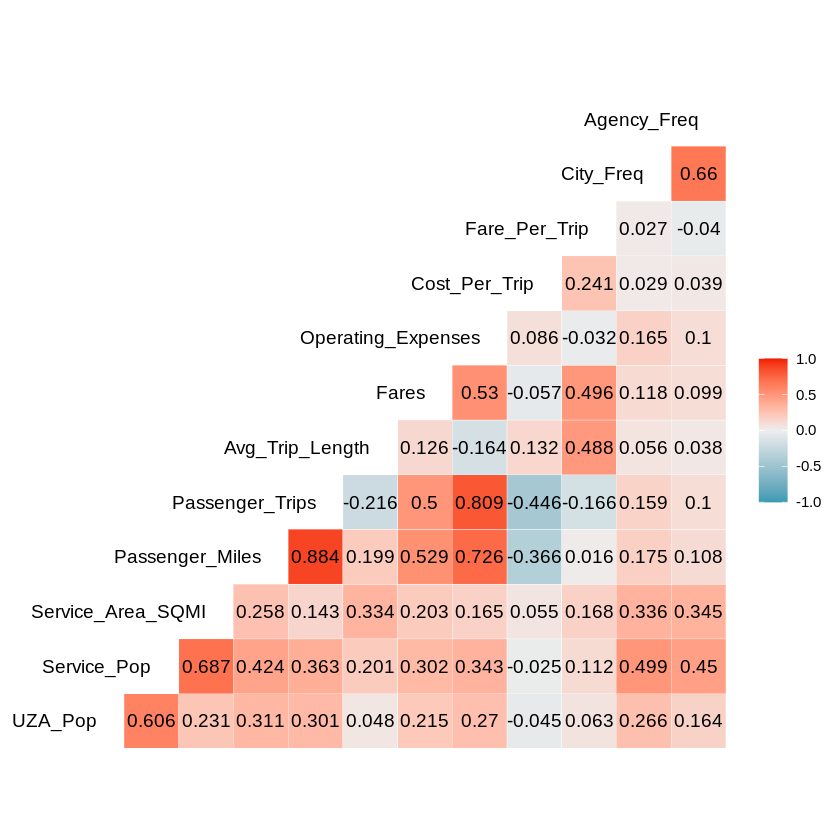

In [19]:
#Correlation plot
numeric_df <- df[, sapply(df, is.numeric)]
corr_plot<-ggcorr(numeric_df, 
                  label = TRUE,
                  label_size = 4,
                  label_round = 3,
                  label_alpha= F,
                  hjust = 1,
                  size = 4,
                  layout.exp = 1
                 ) 
corr_plot 

There is a negative correlation between “Passenger trips” and “Fares per trip,” which suggests that higher fares reduce ridership, but the correlation is weak. This would mean that other factors are likely to contribute to ridership.

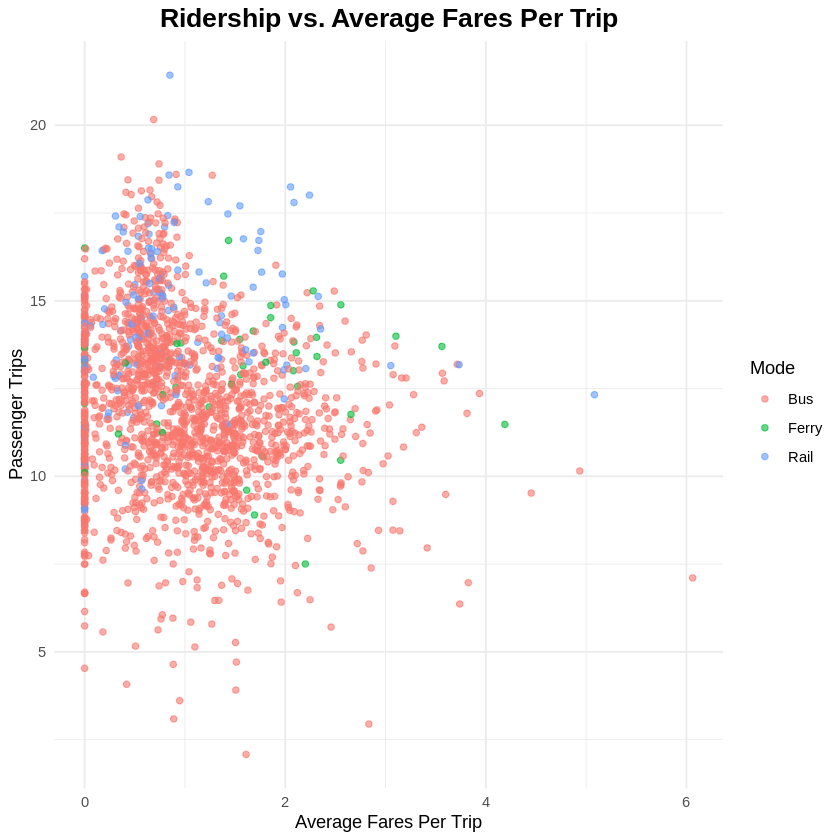

In [20]:
#Ridership vs Average Fares per Trip (by Mode of Transport)
ggplot(df, aes(x = Fare_Per_Trip, y = Passenger_Trips,color = Mode)) +
  geom_point(, alpha = 0.6) +
  theme_minimal() +
  ggtitle("Ridership vs. Average Fares Per Trip") +
  xlab("Average Fares Per Trip") +
  ylab("Passenger Trips")+
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))

I even added a categorical variable into the mix, which showed a similar trend, while also highlighting that the impact of higher fares varies by the transportation mode. Buses (Red) are clustered at lower fare ranges and, as such, have high ridership, while Ferries (Green) are a lot more spread out over high ranges with lower ridership.

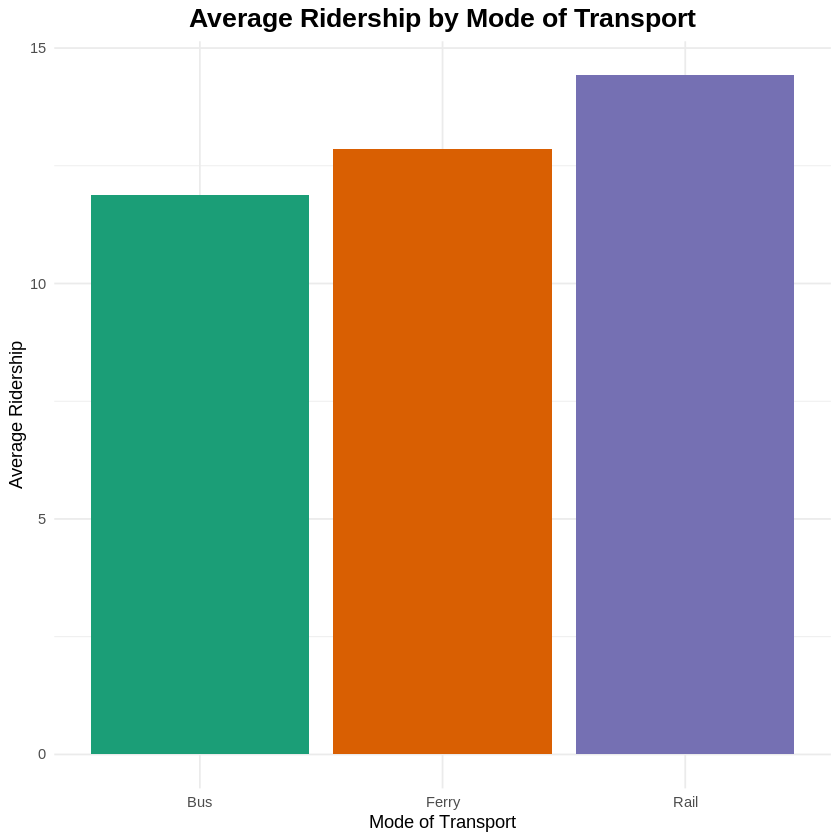

In [21]:
#Average Ridership by Mode of Transport
average_ridership <- df %>%
  group_by(Mode) %>%
  summarise(Average_Ridership = mean(Passenger_Trips, na.rm = TRUE))

ggplot(average_ridership, aes(x = Mode, y = Average_Ridership, fill = Mode)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  scale_fill_brewer(palette = "Dark2") +
  labs(title = "Average Ridership by Mode of Transport",x = "Mode of Transport",y = "Average Ridership") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))


Even though we see a large cluster of points representing buses at the lower fare ranges, on average Rail is a popular form of transportation, likely because of its reliability and capacity. 

`geom_smooth()` using formula 'y ~ x'



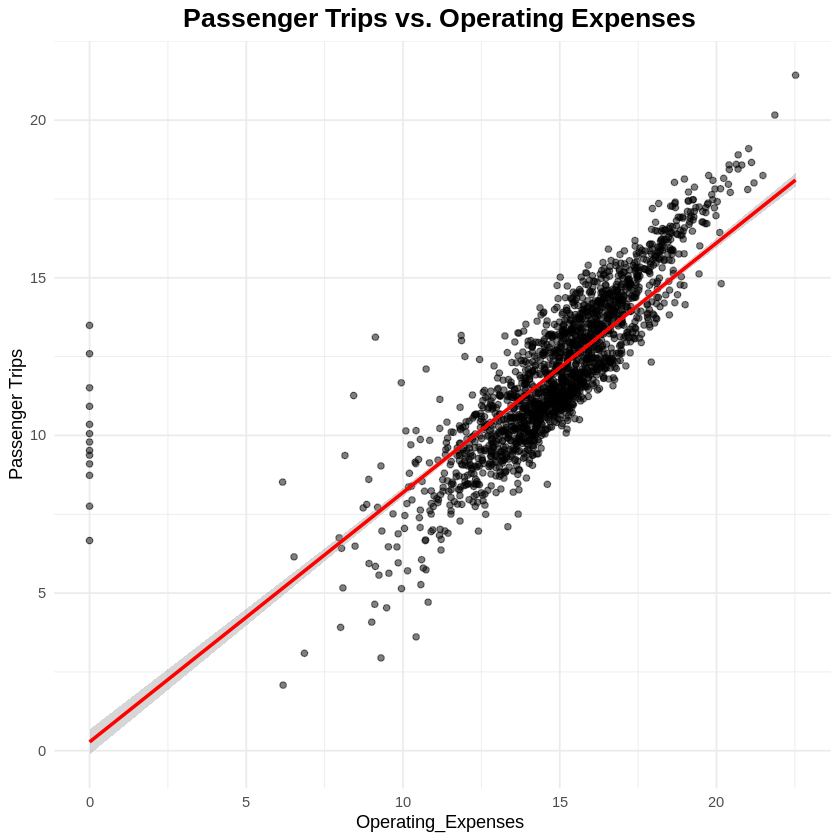

In [22]:
#Passenger Trips vs. Operating Expenses
ggplot(df, aes(x = Operating_Expenses , y = Passenger_Trips)) +
  geom_point( alpha = 0.5) +
  geom_smooth(method = "lm", color = "red") +
  theme_minimal() +
  labs(title = "Passenger Trips vs. Operating Expenses ",x = "Operating_Expenses ", y = "Passenger Trips") +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))


It can be assumed that operation expenses often translate to better infrastructure, increased reliability, and improved frequency.
A well-maintained and efficient transit system is always going to appear attractive to passengers, resulting in higher ridership. That being said, there are some outliers where lower operating costs can lead to higher ridership. It could be representing a part of the population using older, well-established transit systems that require low operating costs while serving millions of people, such as the NYC subway or maybe buses with shorter routes and high passenger turnover.

In [23]:
#Categorizing Trips lengths to either "Small Trips" and "Large Trips"
temp1<- df
trip_threshold <- median(temp1$Avg_Trip_Length)

temp1$Trip_Category <- ifelse(temp1$Avg_Trip_Length <= trip_threshold, "Small Trip", "Large Trip")

temp1$Trip_Category <- as.factor(temp1$Trip_Category)

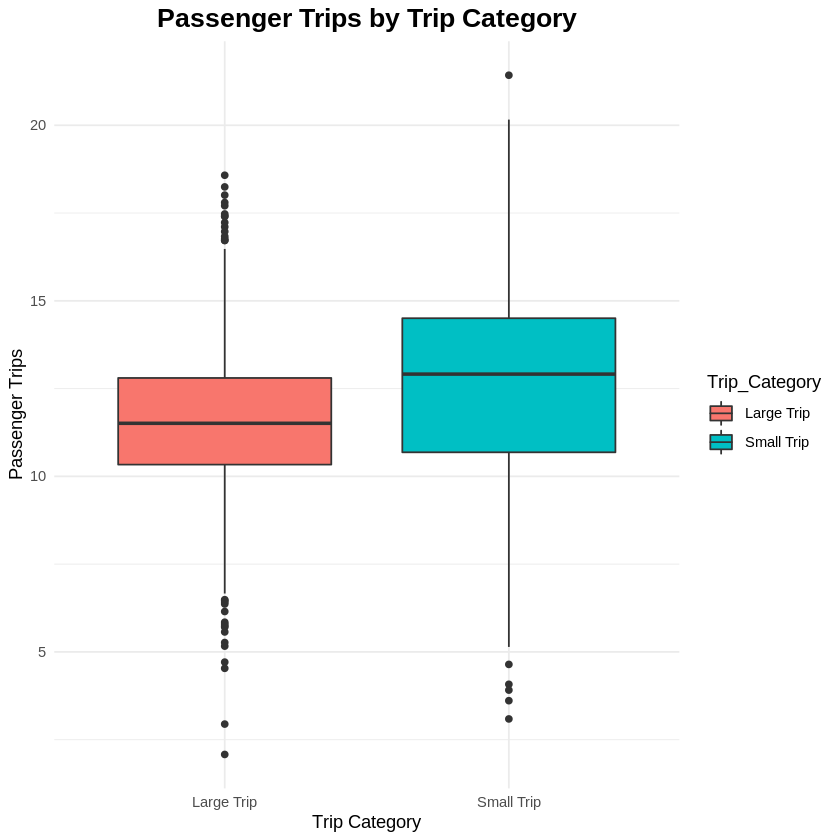

In [24]:
#Passenger Trips vs. Trip Category
ggplot(temp1, aes(x = Trip_Category, y = Passenger_Trips, fill = Trip_Category)) +
  geom_boxplot() +
  labs(title = "Passenger Trips by Trip Category",x = "Trip Category",y = "Passenger Trips") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))

`geom_smooth()` using formula 'y ~ x'



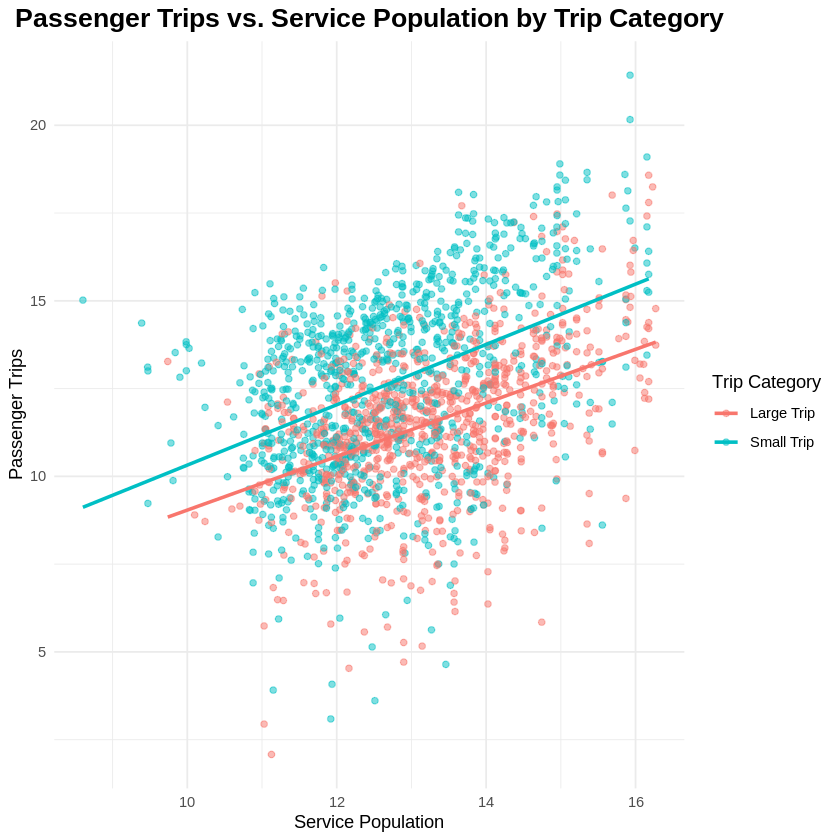

In [25]:
#Passenger Trips vs. Service Population (by Trip Category)
ggplot(temp1, aes(x = Service_Pop, y = Passenger_Trips, color = Trip_Category)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Passenger Trips vs. Service Population by Trip Category",x = "Service Population",y = "Passenger Trips",color = "Trip Category") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))


From the two plots above, it does appear that small trips attract a lot more ridership compared to longer trips, but there doesn't seem to be any sort of clear separation in terms of predicting ridership. 
The scatter plots do show that there is a lot of overlap. Clustering techniques could be employed to confirm this observation.

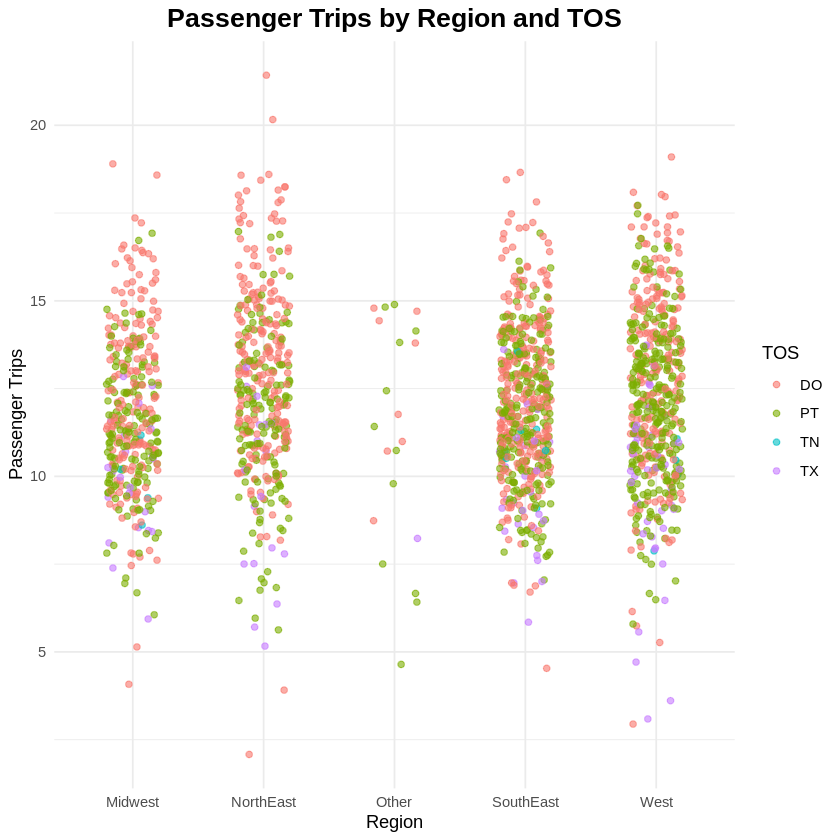

In [26]:
#Passenger Trips by Region and TOS
ggplot(df, aes(x = Region, y = Passenger_Trips, color = TOS)) +
  geom_jitter(alpha = 0.6, width = 0.2) +
  labs(title = "Passenger Trips by Region and TOS",x = "Region",y = "Passenger Trips",color = "TOS") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))

In [27]:
df[df$Region == "Other",]

,TOS,Mode,Org_Type,UZA_Pop,Service_Pop,Service_Area_SQMI,Passenger_Miles,Passenger_Trips,Avg_Trip_Length,Fares,Operating_Expenses,Cost_Per_Trip,Fare_Per_Trip,Region,City_Freq,Agency_Freq
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<table>,<table>
894,DO,Ferry,17,14.42767,13.55717,5.293305,15.081604,13.797897,1.609438,14.274721,16.613565,2.873565,0.9593502,Other,3,1
920,DO,Bus,5,14.42767,13.97845,5.293305,13.851311,10.993883,2.890372,10.898534,15.404110,4.422328,0.6471032,Other,6,2
921,DO,Bus,5,14.42767,13.97845,5.293305,16.034488,14.702238,1.609438,13.570405,17.533648,2.888704,0.2776317,Other,6,2
932,PT,Bus,17,14.42767,13.46079,5.010635,5.135798,4.644391,1.098612,4.990433,9.098403,4.475062,0.8837675,Other,6,3
933,PT,Rail,17,14.42767,13.46079,5.010635,16.310852,14.821003,1.609438,15.175548,18.094163,3.310178,0.8878913,Other,6,3
934,PT,Bus,17,14.42767,13.46079,5.010635,15.081219,13.814272,1.609438,13.036856,16.267761,2.536075,0.3784364,Other,6,3
951,PT,Bus,17,14.42767,14.72333,6.794587,16.418401,14.894661,1.791759,15.985081,16.077151,1.449269,1.3812818,Other,6,1
1036,DO,Ferry,3,14.42767,13.43931,5.192957,0.000000,11.765527,0.000000,14.347646,16.750862,4.992132,2.6553524,Other,3,2
1037,PT,Ferry,3,14.42767,13.43931,5.192957,16.698613,14.141785,2.639057,15.617146,17.785319,3.669442,1.6808279,Other,3,2


Ok, most of the points aside from "Other" seem to be clustering within the same range, meaning that the distribution of passenger trips across the remaining regions is uniform. The Type of Service - "DO" (which represents services that are directly operated by the transit agency itself ) also seems to be more dominant in each region. That said, the type of TOS doesn't seem to impact ridership distribution since they randomly spaced out.

Region - "Others" has only a few states (Alaska, Hawaii, U.S. territories) along with lower transportation demand, which results in fewer points on the plot.

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



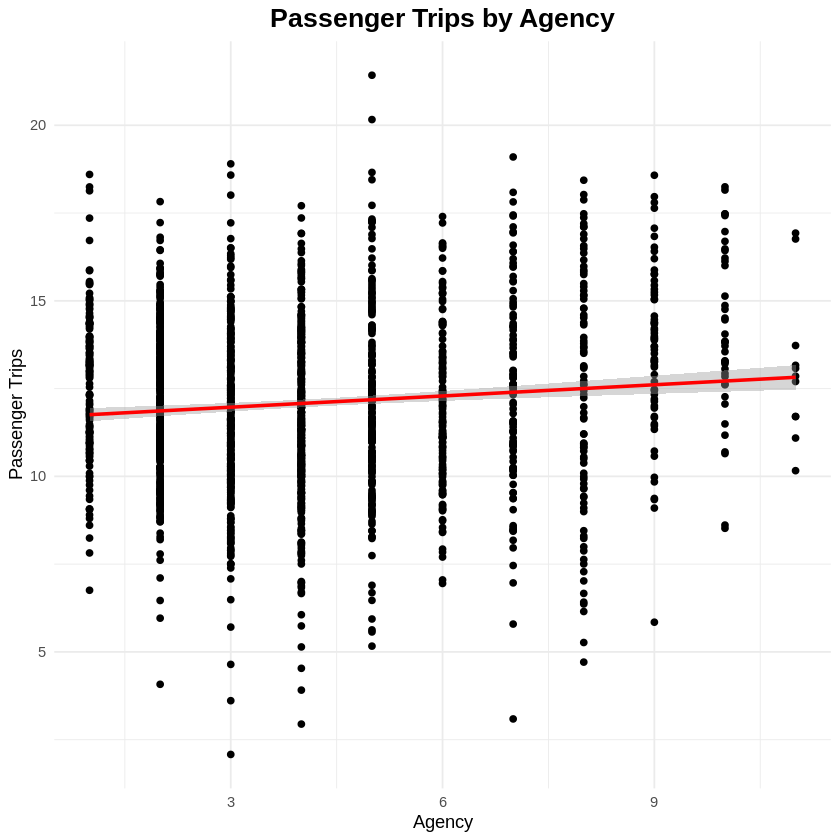

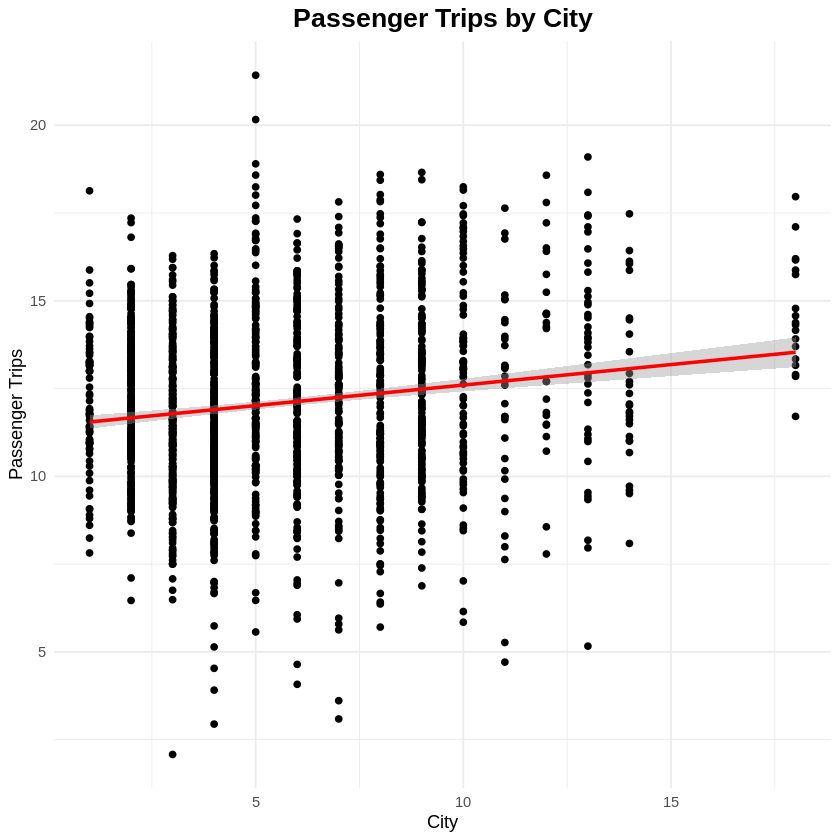

In [28]:
#Passenger Trips by Agency
ggplot(df, aes_string(x = "Agency_Freq", y = "Passenger_Trips")) +
    geom_point() +
    geom_smooth(method = "lm", color = "red") +
    labs(title = "Passenger Trips by Agency",x = "Agency",y = "Passenger Trips") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))

#Passenger Trips by City
ggplot(df, aes_string(x = "City_Freq", y = "Passenger_Trips")) +
    geom_point() +
    geom_smooth(method = "lm", color = "red") +
    labs(title = "Passenger Trips by City",x = "City",y = "Passenger Trips") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))
  

The numerical values on the x-axis for City and Agency represent the frequency of their occurrences in the dataset. The slight upward trend suggests that cities/agencies with more data points tend to have slightly higher passenger trip averages. However, this could be a reflection of sampling frequency rather than a meaningful relationship. Aside from this, the plots don't provide much to work with. 

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



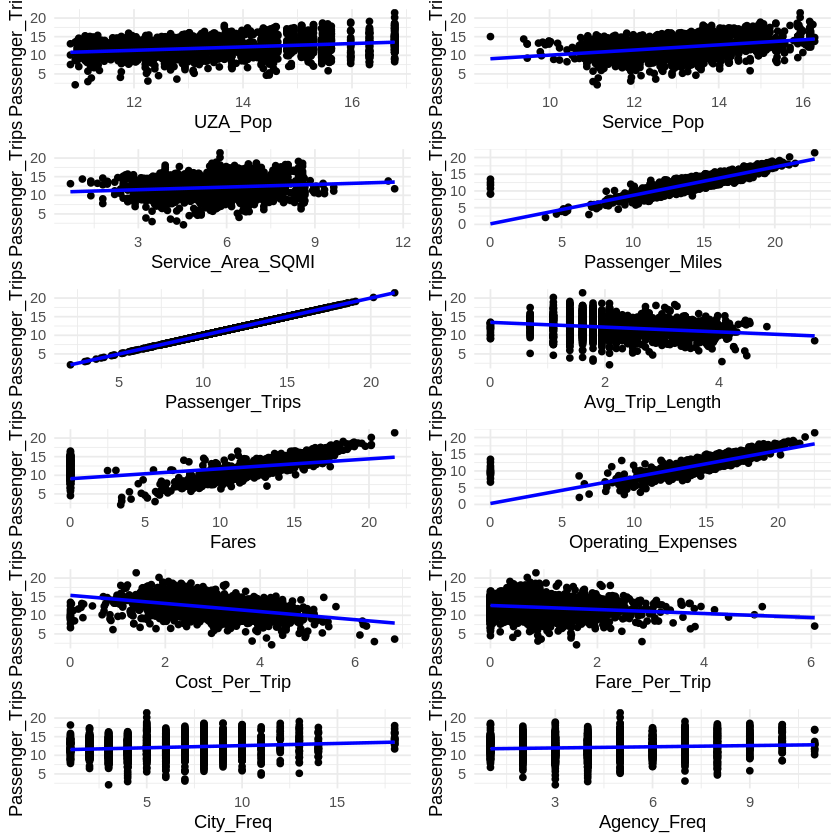

In [29]:
#Checking for linearity
predictors <- colnames(df[, sapply(df, is.numeric)])


plot_list <- list()

# Loop through each predictor and create scatter plots
for (var in predictors) {
  plot <- ggplot(df, aes_string(x = var, y = "Passenger_Trips")) +
    geom_point() +
    geom_smooth(method = "lm", color = "blue") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))
  
  plot_list[[var]] <- plot
}

# Arrange the plots in 2 columns
grid.arrange(grobs = plot_list, ncol = 2)

Ok, from the looks of it, some of the numerical variables' relationship with Passenger_Trips appear as non-linear. And as such, I might have to use a Polynomial Regression Model. I shall decide once I have selected my main factors.

## Feature Engineering 

For this phase of the project, I aim to identify sets of variable combinations that affect ridership since Fare prices on their own are not strong enough to influence it.

This will be done by employing PCA, FA, and Feature selection using Random forest.

PCA
----

In [30]:
#First we identify the values that have no varience 
numeric_df <- df[, sapply(df, is.numeric)]
zero_var <- sapply(numeric_df, function(x) var(x) == 0)
t(zero_var)

UZA_Pop,Service_Pop,Service_Area_SQMI,Passenger_Miles,Passenger_Trips,Avg_Trip_Length,Fares,Operating_Expenses,Cost_Per_Trip,Fare_Per_Trip,City_Freq,Agency_Freq
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8633 1.3240 1.3035 1.04186 0.94747 0.86955 0.75574
Proportion of Variance 0.3156 0.1594 0.1545 0.09868 0.08161 0.06874 0.05192
Cumulative Proportion  0.3156 0.4750 0.6294 0.72812 0.80973 0.87846 0.93039
                           PC8     PC9    PC10    PC11
Standard deviation     0.58054 0.44734 0.41042 0.24528
Proportion of Variance 0.03064 0.01819 0.01531 0.00547
Cumulative Proportion  0.96103 0.97922 0.99453 1.00000

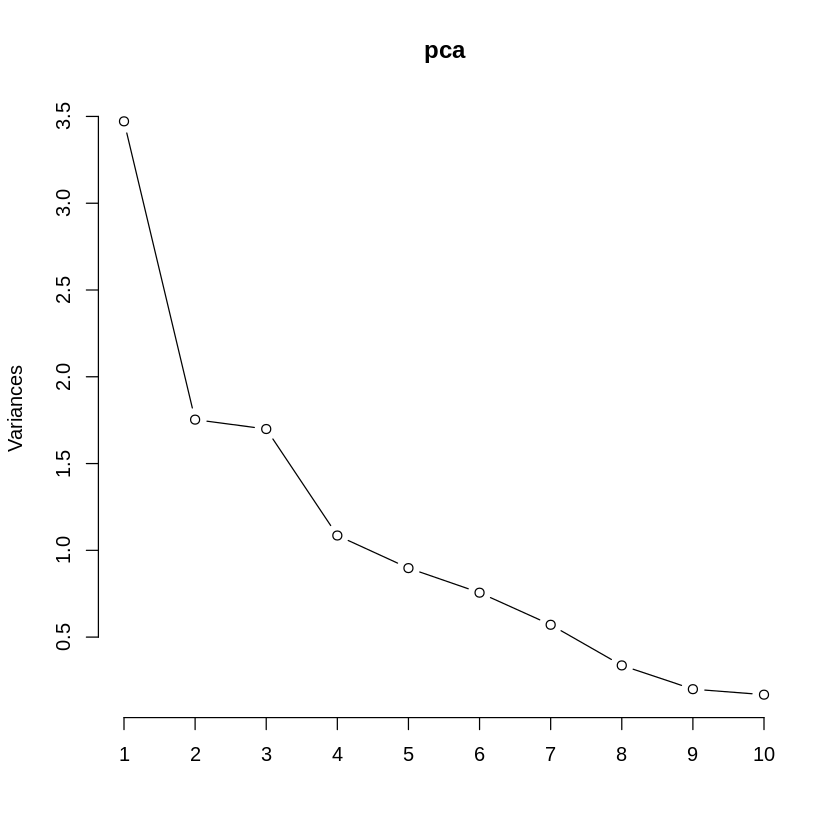

In [31]:
#Not including the target variable since we are trying to reduce dimensions
numeric_df <- numeric_df[, !colnames(numeric_df) %in% c("Passenger_Trips")]

#PCA
pca <- prcomp(numeric_df, center = TRUE, scale. = TRUE)

# Summary of PCA to check explained variance
summary(pca)


plot(pca,type="lines")

From the looks of it, the first five principal components seem to explain most of the variance. 

In [32]:
loadings_df <- as.data.frame(pca$rotation[, 1:5])
print(loadings_df)

                           PC1         PC2         PC3         PC4         PC5
UZA_Pop            -0.31438979 -0.06815382  0.08823280 -0.06074451 -0.64709177
Service_Pop        -0.45700508  0.09335314  0.16296500 -0.11171163 -0.28815515
Service_Area_SQMI  -0.35509714  0.26179129  0.06872715 -0.19678583 -0.13149117
Passenger_Miles    -0.36934786 -0.40785285 -0.17952434 -0.17962884  0.12814210
Avg_Trip_Length    -0.15503512  0.42552358 -0.34314053 -0.38543718  0.04172240
Fares              -0.32320143 -0.15986370 -0.41772098  0.18007118  0.27317137
Operating_Expenses -0.31862543 -0.42709222 -0.12771670  0.42163353 -0.02657609
Cost_Per_Trip       0.02322806  0.39128160 -0.10036850  0.71627607 -0.28862876
Fare_Per_Trip      -0.14318356  0.36713837 -0.52806084  0.06833740  0.13987821
City_Freq          -0.31687281  0.18073600  0.38723656  0.13442002  0.32587595
Agency_Freq        -0.27986947  0.20535277  0.42577335  0.13522940  0.42236391


The factors that contributes to each PC:

PC1 - Service_Pop,Passenger_Miles,Service_Area_SQMI,UZA_Pop,Fares,Operating_Expenses,City_Freq

PC2 - Operating_Expenses,Passenger_Miles,Avg_Trip_Length,Cost_Per_Trip,Fare_Per_Trip

PC3 - Fare_Per_Trip,Agency_Freq,Avg_Trip_Length,City_Freq

PC4 - Cost_Per_Trip,Operating_Expenses,Avg_Trip_Length

PC5 - UZA_Pop,Agency_Freq,City_Freq

Final list from PCA- Passenger_Miles, Operating_Expenses, Fare_Per_Trip, Cost_Per_Trip, Avg_Trip_Length, City_Freq,Agency_Freq,UZA_Pop

Factor analysis
----

 [1] 3.47175423 1.75309164 1.69898700 1.08547398 0.89769577 0.75610927
 [7] 0.57114140 0.33702912 0.20011004 0.16844682 0.06016071


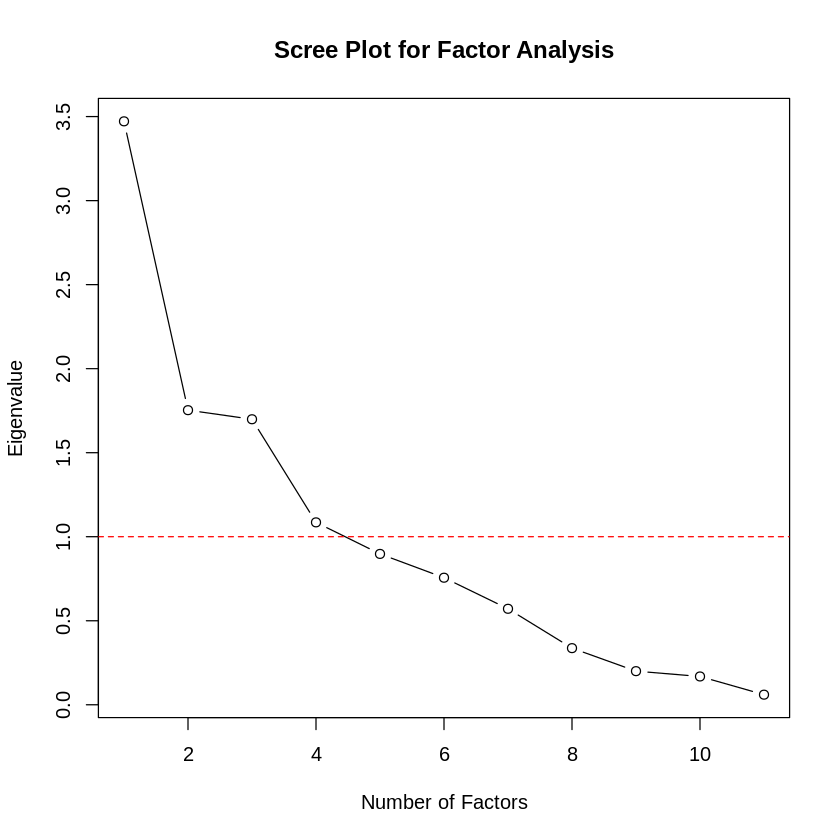

In [33]:
#Finding the ideal No.of factors we need:
eigenvalues <- eigen(cor(numeric_df))$values
print(eigenvalues)
plot(eigenvalues, type = "b", xlab = "Number of Factors", ylab = "Eigenvalue",
     main = "Scree Plot for Factor Analysis")
abline(h = 1, col = "red", lty = 2)

Using the "Elbow Rule", I can see that there is a sharp decline in values up to four factors, after which the slope starts to flatten out. This might suggest that the first three points are enough to explain most of the variance. 
I also used the Kaiser Criterion, which states that eigenvalues greater than 1 explain the most variance. This can be seen from the red dashed line. Therefore, I concluded first four points are likely better. 

"Elbow Rule" could have been applied to the PCA as well, but I wanted to select the components that at least explain 80% of the variance.

In [34]:
fa_model <-  factanal(numeric_df,  4, rotation="varimax")
print(fa_model,cutoff=0.5, sort=TRUE)


Call:
factanal(x = numeric_df, factors = 4, rotation = "varimax")

Uniquenesses:
           UZA_Pop        Service_Pop  Service_Area_SQMI    Passenger_Miles 
             0.622              0.005              0.478              0.005 
   Avg_Trip_Length              Fares Operating_Expenses      Cost_Per_Trip 
             0.099              0.642              0.005              0.313 
     Fare_Per_Trip          City_Freq        Agency_Freq 
             0.671              0.744              0.785 

Loadings:
                   Factor1 Factor2 Factor3 Factor4
UZA_Pop             0.580                         
Service_Pop         0.965                         
Service_Area_SQMI   0.653                         
Passenger_Miles             0.850                 
Fares                       0.560                 
Operating_Expenses          0.944                 
Avg_Trip_Length                     0.943         
Fare_Per_Trip                       0.527         
Cost_Per_Trip           

From the results obtained above, it appears that factor 1 is best overall as it has the highest variance explained compared to the rest, but the combination of variables makes me believe that the factor is trying to capture the overall scale of the area served and can potentially impact ridership. 

Factor 2, on the other hand, has the 2nd highest variance explained and has a combination of variables that might be measuring service, which could impact ridership. Factor 3 might also play a role because of its combination as it relates to length and cost.

Factor 4 has the lowest variance explained and, as such, for the time being, will be ignored.

Exploring categorical variables
-----

Since PCA and FA only work with numerical values, categorical values were excluded. However, the categorical values can still play a vital role in effecting ridership. Now, I shall focus my attention on that.

In [35]:
tempnames=  c("TOS", "Mode", "Org_Type", "Region", "Passenger_Trips")
df_cat <- data.frame(df[,tempnames])
check <- lm(Passenger_Trips ~., data = df_cat)
summary(check)


Call:
lm(formula = Passenger_Trips ~ ., data = df_cat)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5641  -1.3998   0.0175   1.5025   6.5736 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      12.0711     0.5317  22.701  < 2e-16 ***
TOSPT            -0.9109     0.1091  -8.351  < 2e-16 ***
TOSTN            -2.0762     0.5734  -3.621 0.000301 ***
TOSTX            -2.7734     0.2219 -12.500  < 2e-16 ***
ModeFerry         0.6709     0.3423   1.960 0.050172 .  
ModeRail          2.0632     0.1977  10.437  < 2e-16 ***
Org_Type13        1.0356     0.6311   1.641 0.100981    
Org_Type14       -0.8425     0.6521  -1.292 0.196566    
Org_Type15        0.9759     0.7752   1.259 0.208219    
Org_Type17        1.1915     0.6252   1.906 0.056861 .  
Org_Type18        2.3477     0.6892   3.406 0.000672 ***
Org_Type20        0.7879     0.7706   1.022 0.306708    
Org_Type3        -0.2088     0.5279  -0.396 0.692436    
Org_Type5         0.2566   

It is evident that Org_type does not influence Passenger_Trips aside from Or_type -13. Mode and TOS seem to be the most significant followed by Region. 

A thing to note is that the categorical values together only explain 20% of the variance which is quite low. It does seem to imply that the categorical values are not as important as numerical values in this case. 

Feature Ranking
---

,%IncMSE,IncNodePurity
TOS,6.043012,58.25838
Mode,13.162226,57.72414
Org_Type,5.645987,33.67344
UZA_Pop,7.184911,76.27318
Service_Pop,10.982873,157.48411
Service_Area_SQMI,9.005677,40.85082
Passenger_Miles,36.648596,4071.41343
Avg_Trip_Length,38.430888,423.86697
Fares,20.242494,1704.68274
Operating_Expenses,33.933546,3331.07571


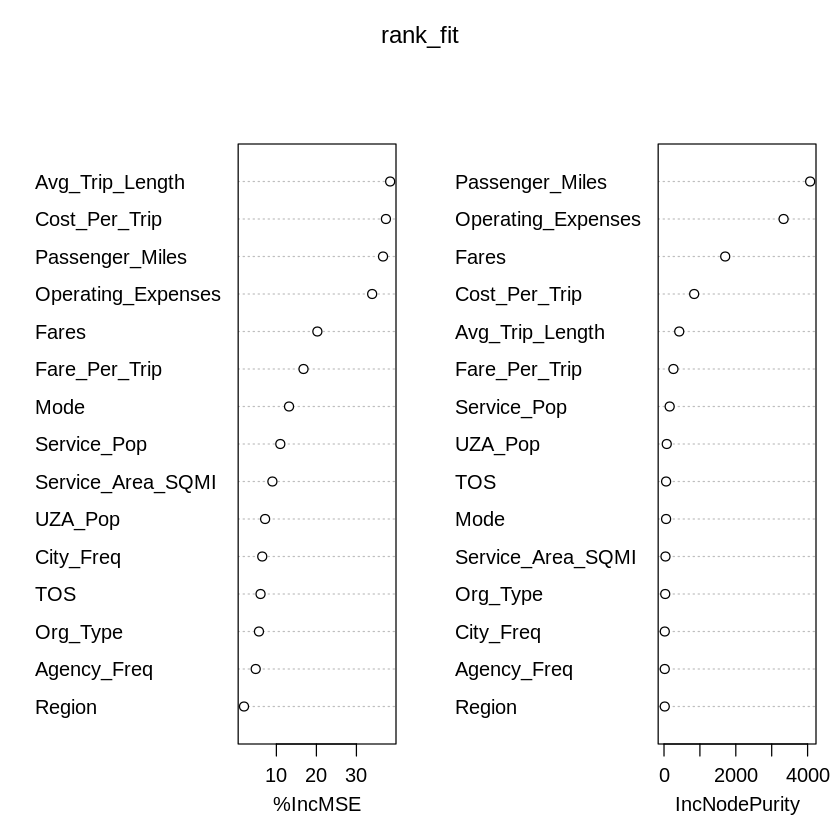

In [36]:
set.seed(123)
rank_fit <- randomForest(Passenger_Trips~., method="class",data = df, importance=TRUE)
importance(rank_fit)
varImpPlot(rank_fit)

From the above data, based on their importance and contribution to predicting Passenger_Trips accurately, the following features seem to be the best: 1)Passenger_Miles

2)Operating_Expenses

3)Avg_Trip_Length

4)Cost_Per_Trip

5)Fares

5)Service_Pop

6)UZA_Pop

7)Fare_Per_Trip

8) Mode

After conducting the above tests, I have identified the best variables aside from Fare_per_trip as follows:

Passenger_Miles
Operating_Expenses
Avg_Trip_Length
Cost_Per_Trip
Fares
Service_Pop
UZA_Pop
Mode
Fare_Per_Trip

But a few notable variables will have to be removed:

Passenger_Miles measures the total distance traveled by all passengers and is a byproduct of ridership and trip length. Therefore, it more or less reflects ridership, acting as a good predictor but is not a factor that influences.

Fares have a high correlation with Operation_Expenses. To reduce multicollinearity, it will be removed. 

UZA_Pop represents the population of the city and will be removed. Since we have Service_Pop that represents the population with access to transit service, it acts as a direct measure of the ridership base. 


Finalized features to be used are:

1)Operating_Expenses

2)Avg_Trip_Length

3)Cost_Per_Trip

4)Service_Pop

5)Mode

6)Fare_Per_Trip

## The Rest..


Additional Analysis....

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



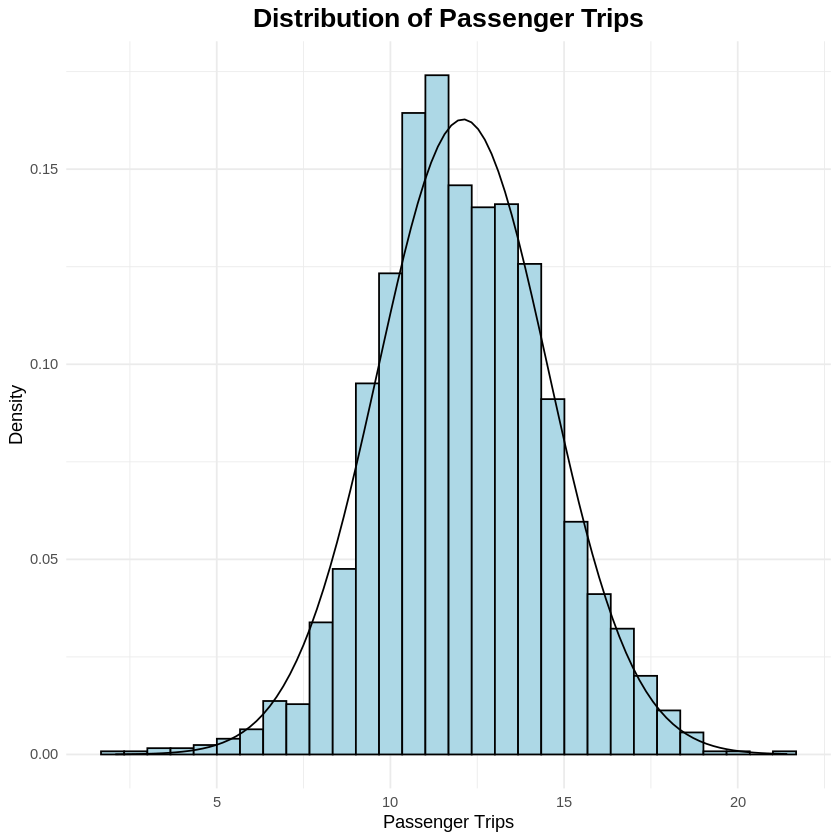


	Shapiro-Wilk normality test

data:  df$Passenger_Trips
W = 0.99649, p-value = 0.0002775


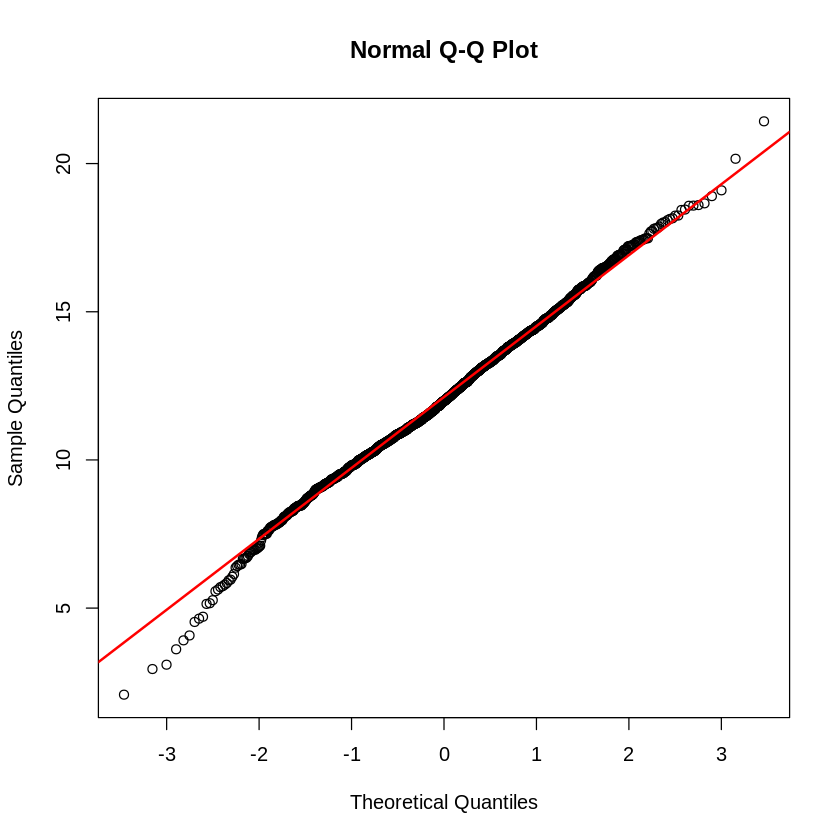

In [37]:
# Plotting histogram with distribution curve
ggplot(df, aes(x = Passenger_Trips)) +
  geom_histogram(aes(y = ..density..),fill = "lightblue", color = "black") +
  stat_function(fun = dnorm, args = list(mean = mean(df$Passenger_Trips, na.rm = TRUE),sd = sd(df$Passenger_Trips, na.rm = TRUE)), color = "black") +
  labs(title = "Distribution of Passenger Trips",
       x = "Passenger Trips",
       y = "Density") +
  theme_minimal()+
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))
# Q-Q Plot
qqnorm(df$Passenger_Trips)
qqline(df$Passenger_Trips, col = "red", lwd = 2)

shapiro.test(df$Passenger_Trips)


Before I start with the Hypothesis testing, I wanted to check if Passengers_Trips is normally distributed. To do so visually by plotting a histogram with a distribution curve and Q-Q plot. I also used the Shapiro-Wilk normality test.

The distribution curve on the histogram is bell-shaped, which means that the data is normally distributed. For the Q-Q plot, most of the points are lying on the x=y line, which further supports the assumption.

The concern is the Shapiro-Wilk Test. The p-value is less than 0.05, which does reject the Null hypothesis, suggesting that the data is not normally distributed. Interestingly, the W value is very close to 1, indicating that the data is approximately normal. Maybe because of the decently large data size (1800+), the test is more sensitive in detecting small deviations from normality. This could be the reason why the p-value is low.

So, taking the visuals, data size, and high W value into consideration, I can reasonably consider the Passenger_Trip data as normally distributed.

What about the remaining numerical variables?


Shapiro-Wilk Test for Service_Pop 

	Shapiro-Wilk normality test

data:  data[[feature]]
W = 0.98861, p-value = 6.133e-11




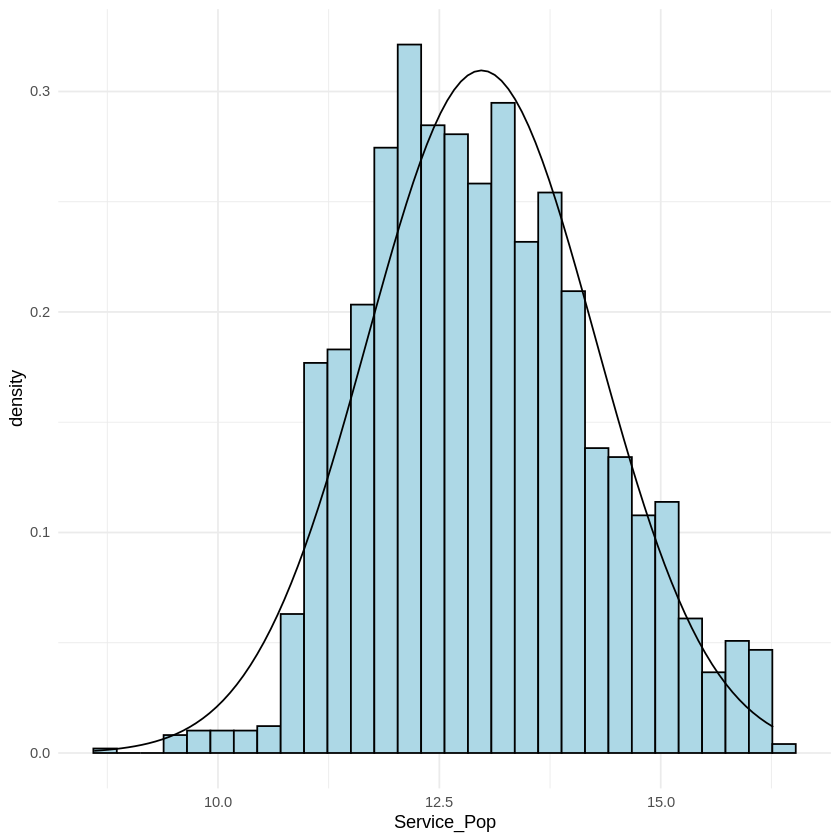


Shapiro-Wilk Test for Avg_Trip_Length 

	Shapiro-Wilk normality test

data:  data[[feature]]
W = 0.96069, p-value < 2.2e-16




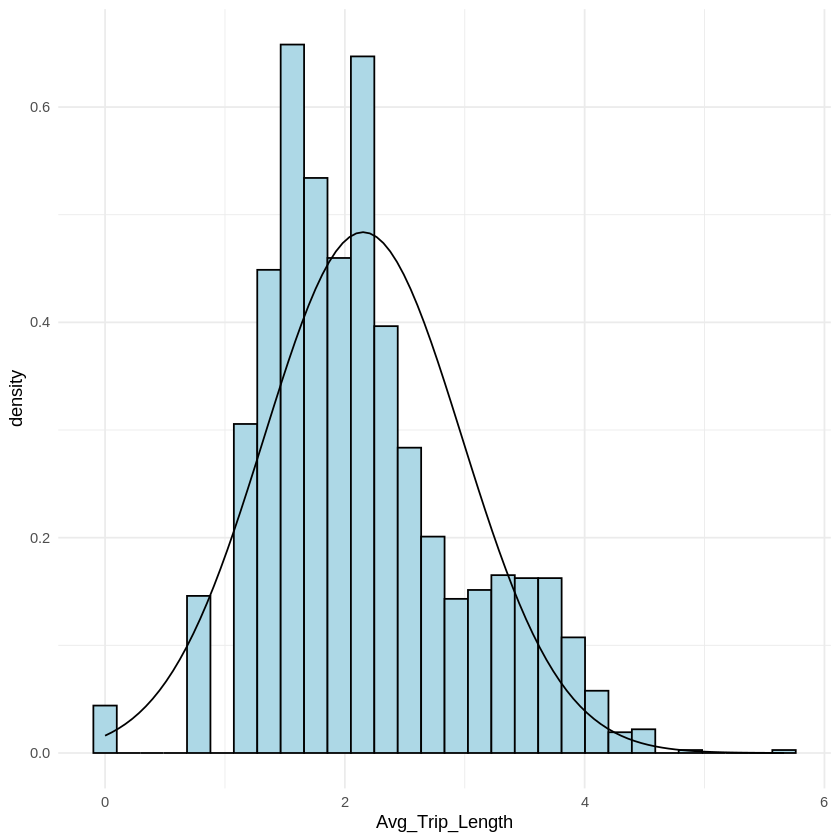


Shapiro-Wilk Test for Operating_Expenses 

	Shapiro-Wilk normality test

data:  data[[feature]]
W = 0.90704, p-value < 2.2e-16




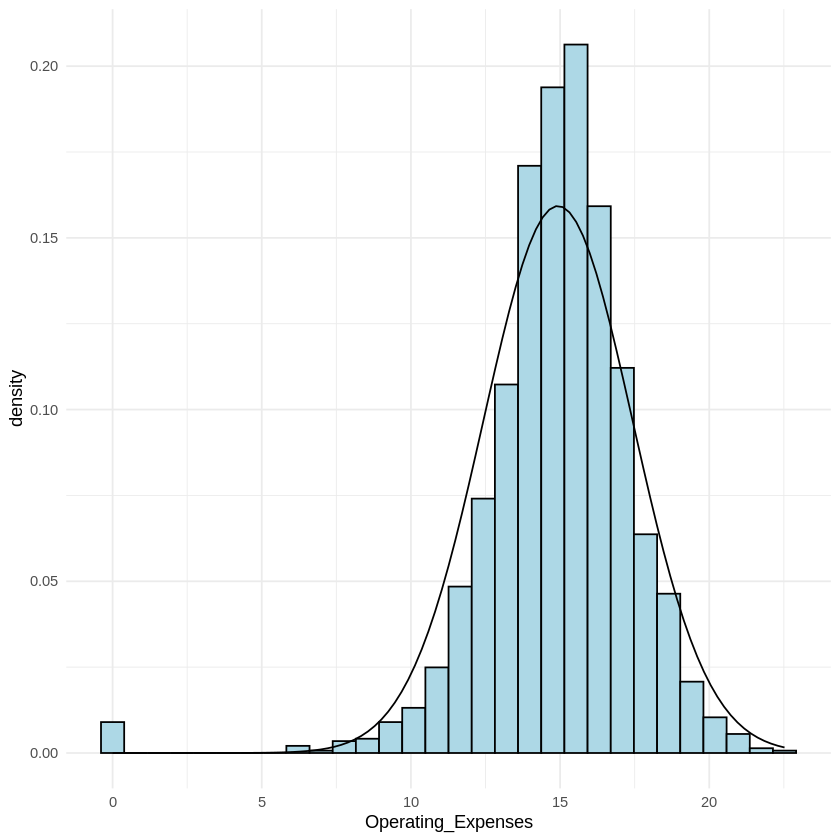


Shapiro-Wilk Test for Cost_Per_Trip 

	Shapiro-Wilk normality test

data:  data[[feature]]
W = 0.99207, p-value = 1.72e-08




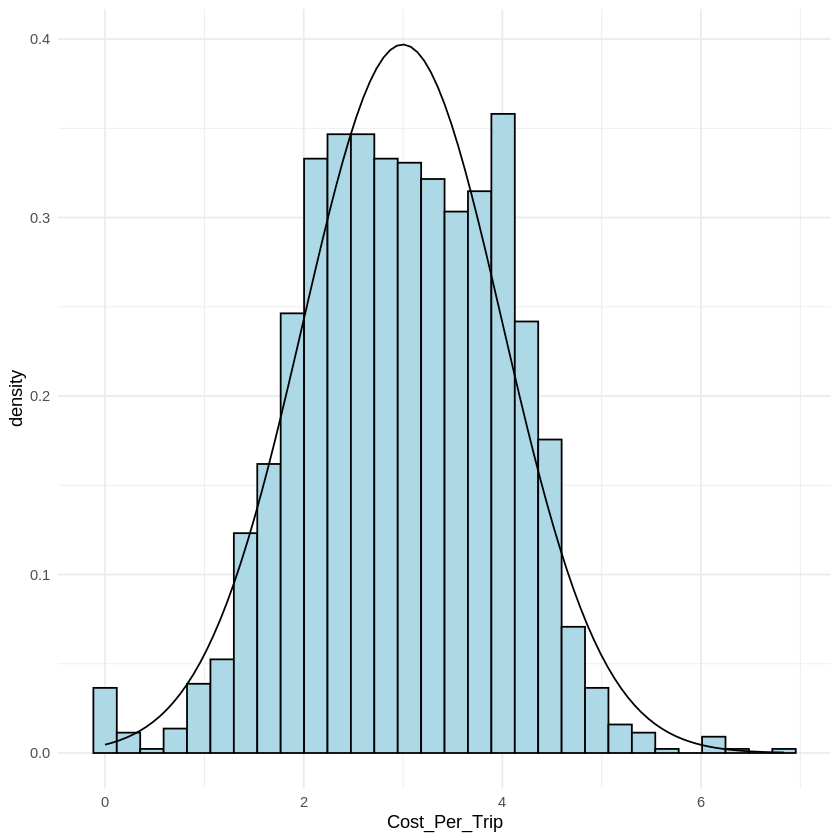


Shapiro-Wilk Test for Fare_Per_Trip 

	Shapiro-Wilk normality test

data:  data[[feature]]
W = 0.93333, p-value < 2.2e-16




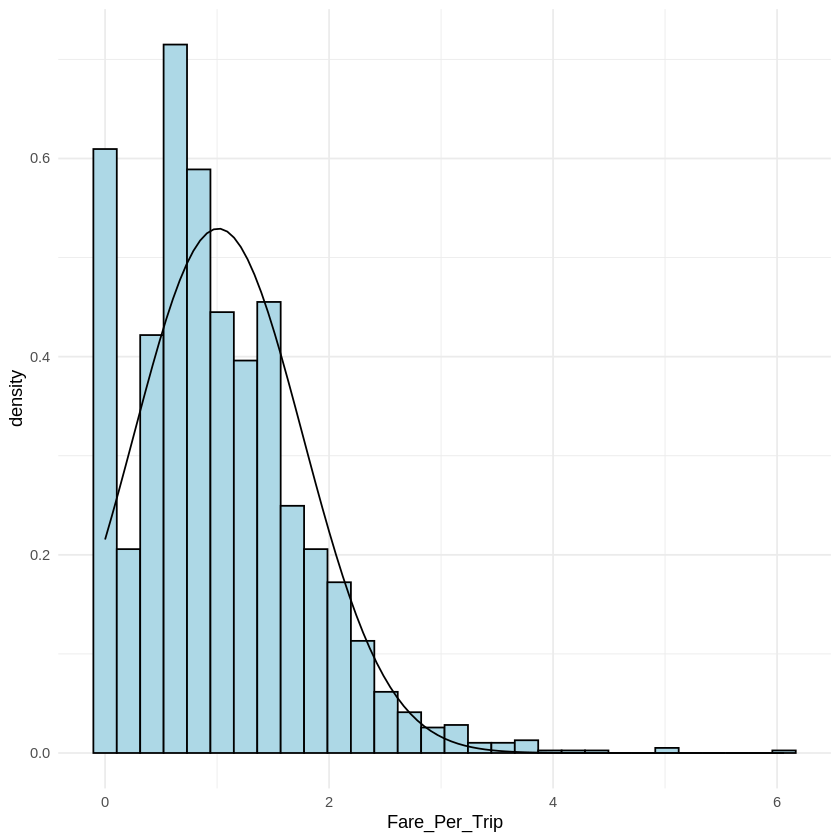

In [38]:
temp_df <- df[, colnames(df) %in% c("Operating_Expenses","Avg_Trip_Length","Cost_Per_Trip","Service_Pop","Fare_Per_Trip")]

# Function to plot histogram with distirbution curve and perform Shapiro-Wilk test
check_normality <- function(data, feature) {
   #Plotting histogram with distribution curve 
    p <- ggplot(data, aes_string(x = feature)) +
    geom_histogram(aes(y = ..density..),bins = 30, fill = "lightblue", color = "black") +
    stat_function(fun = dnorm, args = list(mean = mean(data[[feature]], na.rm = TRUE),sd = sd(data[[feature]], na.rm = TRUE)),color = "black") +
    theme_minimal()
    print(p)
  
  
  # Shapiro-Wilk test
  shapiro_test <- shapiro.test(data[[feature]])
  cat("\nShapiro-Wilk Test for", feature, "\n")
  print(shapiro_test)
  cat("\n")
}

# Apply the function to each numeric column
for (feature in colnames(temp_df)) {
  check_normality(temp_df, feature)
}

Operating_Expenses seem to have almost a normal distribution since the bell shape is visible, and the tails are not excessively skewed. 
While Fare_Per_Trips appears to be right-skewed, the remaining variables do not exactly have a normal distribution.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



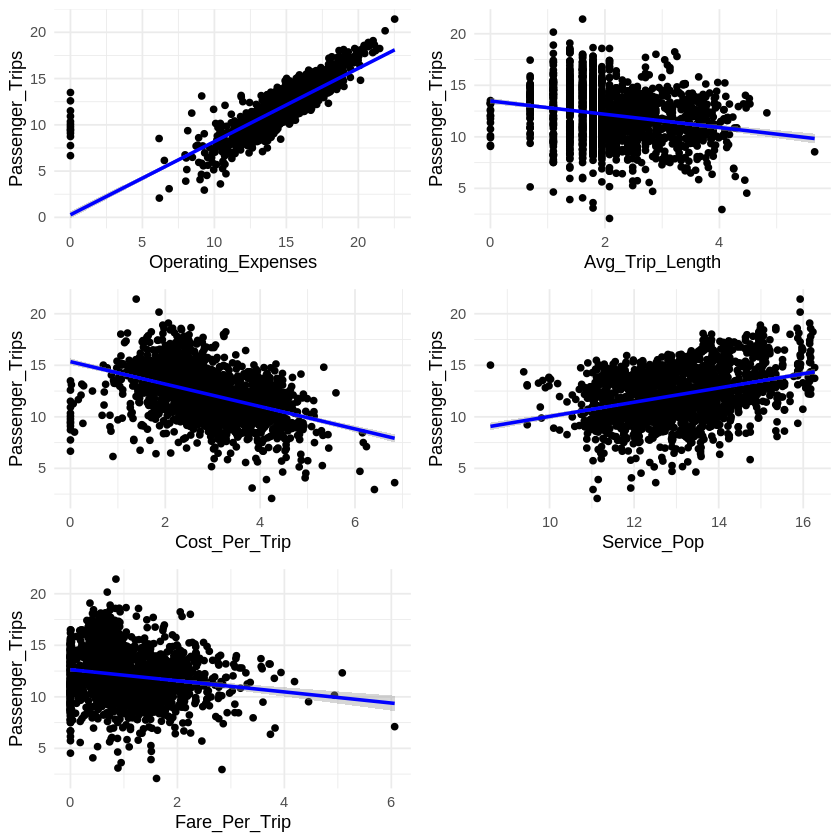

In [39]:
predictors <- c("Operating_Expenses", "Avg_Trip_Length", "Cost_Per_Trip", 
                "Service_Pop", "Fare_Per_Trip")

plot_list <- list()
for (var in predictors) {
  plot <- ggplot(df, aes_string(x = var, y = "Passenger_Trips")) +
    geom_point() +
    geom_smooth(method = "lm", color = "blue") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))
  
  plot_list[[var]] <- plot
}
grid.arrange(grobs = plot_list, ncol = 2)

Just a quick glimpse to see the linearity of the predictor variables. Looking closely at the relationships, it seems few are weakly linear. While there is some variability, there is no strong indication of non-linearity. So I can use a linear model for the hypothesis testing.

The anova test along with Tukey test was primary done to compare the effect of different transportation modes on ridership

In [40]:
# ANOVA for Mode
anova_mode <- aov(Passenger_Trips ~ Mode, data = df)
summary(anova_mode)

#TukeyHSD test
tukey_mode <- TukeyHSD(anova_mode)
print(tukey_mode)


              Df Sum Sq Mean Sq F value Pr(>F)    
Mode           2    863   431.7   77.81 <2e-16 ***
Residuals   1857  10302     5.5                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Passenger_Trips ~ Mode, data = df)

$Mode
                diff       lwr      upr     p adj
Ferry-Bus  0.9851263 0.1413832 1.828869 0.0171276
Rail-Bus   2.5446296 2.0585960 3.030663 0.0000000
Rail-Ferry 1.5595033 0.6046692 2.514337 0.0003876



This shows that there is a significant difference in passenger trips across different transportation modes and different types of services. The Tukey shows that the mode of transportation used significantly affects ridership, especially when comparing rail with bus and ferry.

I also wanted to confirm the observation regarding small trips and large trips:

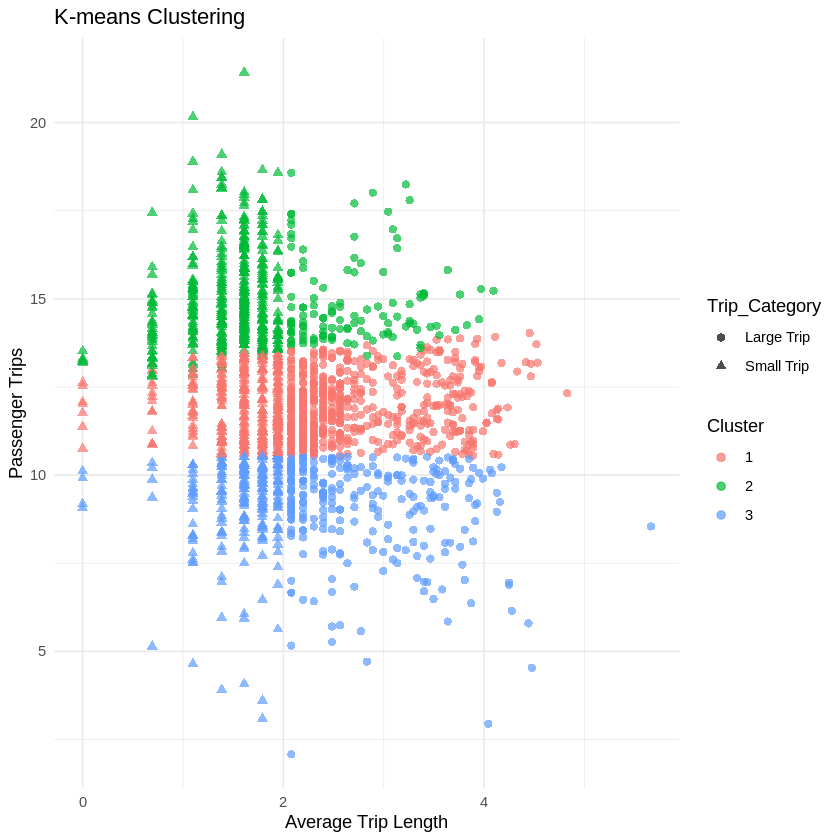

In [41]:
set.seed(123)
temp2 <- df[, c("Passenger_Trips", "Avg_Trip_Length", "Mode")]
#Categorizing Trips lengths to either "Small Trips" and "Large Trips"
temp2$Trip_Category <- ifelse(temp2$Avg_Trip_Length > median(temp2$Avg_Trip_Length), "Large Trip", "Small Trip")
temp2$Mode <- as.numeric(as.factor(temp2$Mode))

# Perform K-means clustering
kmeans_result <- kmeans(temp2[, c("Passenger_Trips", "Avg_Trip_Length", "Mode")], centers = 3)
temp2$Cluster <- as.factor(kmeans_result$cluster)
temp2$Trip_Category <- as.factor(temp2$Trip_Category)

# Ploting the created clusters
ggplot(temp2, aes(x = Avg_Trip_Length, y = Passenger_Trips, color = Cluster, shape = Trip_Category)) +
  geom_point(size = 2, alpha = 0.7) +
  labs(title = "K-means Clustering",x = "Average Trip Length",y = "Passenger Trips") +
  theme_minimal()

Ok, there does not seem to be a perfect separation based on trip length and ridership. There is overlap, especially when long and short trips mix within all the clusters.

Due to this complex nature, it does imply that trip length on its own is not a good predictor. 

Hypothesis:
---

Null Hypothesis (H₀): Ridership is not significantly affected by fare prices and other factors

Alternative Hypothesis (H₁):Ridership is affected by fare prices along with other factors.


As mentioned before, I will be using a Linear model, but I will also use the model to assess whether the Null Hypothesis can be rejected. This is because, given the nature of the hypothesis, T-test and Z-test can not be done since it is used to measure the mean between two variables, while my goal is to investigate the relationship between ridership and the combination of fare prices along with other significant factors.


In [42]:
#Linear Model
fit1 <- lm(Passenger_Trips ~ Operating_Expenses+Avg_Trip_Length+Cost_Per_Trip+Service_Pop+Fare_Per_Trip+Mode, data = df)

# Summary of the model
summary(fit1)


Call:
lm(formula = Passenger_Trips ~ Operating_Expenses + Avg_Trip_Length + 
    Cost_Per_Trip + Service_Pop + Fare_Per_Trip + Mode, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7912 -0.2995  0.0323  0.2399  9.8617 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.2612507  0.1712693  13.203  < 2e-16 ***
Operating_Expenses  0.8008227  0.0069236 115.666  < 2e-16 ***
Avg_Trip_Length    -0.0577826  0.0229398  -2.519   0.0119 *  
Cost_Per_Trip      -1.2343359  0.0160438 -76.935  < 2e-16 ***
Service_Pop         0.1332116  0.0135013   9.867  < 2e-16 ***
Fare_Per_Trip      -0.0476824  0.0243636  -1.957   0.0505 .  
ModeFerry          -0.0007458  0.1041422  -0.007   0.9943    
ModeRail            0.2438564  0.0613033   3.978 7.22e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6645 on 1852 degrees of freedom
Multiple R-squared:  0.9268,	Adjusted R-squared:  0.9265 
F-s

Most of the P-values for the variables are below 0.05, indicating statistical significance and suggesting that ridership is influenced by fare prices along with other factors.

Interestingly, Mode - Ferry has no significance compared to Bus and Rail. The reasoning could be due to factors such as lower ferry usage or limited availability. 

Fare_per_trip has a p-value of 0.0505, which is slightly above the 0.05 significance threshold. This suggests that it has a weak effect on passenger trips and aligns with the fact that fare price is not a strong predictor of ridership.

So I employed the F-test to test whether the model with all predictors is significantly better than a model with no predictors.

Null Hypothesis (H₀): All coefficients are equal to zero. Operating_Expenses, Avg_Trip_Length, Cost_Per_Trip, Service_Pop, Fare_Per_Trip, and Mode do not have a significant effect on Passenger_Trips

Alternative Hypothesis (H₁): At least one of the coefficients is not zero, implying that the predictors do have a significant effect on Passenger_Trips.

Some of the stats the summary already provided:

F-statistic: 3348

p-value: < 2.2e-16

Since the p-value is extremely small (<0.05), we reject the Null Hypothesis. This implies that the model with the predictors fits much better than a model without them. Therefore, Ridership is significantly affected by fare prices and other factors.

In [43]:
vif(fit1)

,GVIF,Df,GVIF^(1/(2*Df))
Operating_Expenses,1.266004,1,1.125168
Avg_Trip_Length,1.506777,1,1.227508
Cost_Per_Trip,1.094748,1,1.046302
Service_Pop,1.274709,1,1.129030
Fare_Per_Trip,1.419999,1,1.191637
Mode,1.154156,2,1.036492


The Adjusted R-squared value is 0.9268, meaning that 93% of the variance was explained by the variables mentioned above.

I also checked for multicollinearity. It doesn't appear to be too bad.

Running Model
---

In [44]:
set.seed(123) 

split <- sample.split(df$Passenger_Trips,  SplitRatio = 0.7)
# Train data will have 70% of data
train_data  = subset(df, split == TRUE)

# Test data will have the rest 30% of data
test_data  = subset(df, split == FALSE)

dim(df)
dim(train_data)
dim(test_data)

[1] 1860   16

[1] 1302   16

[1] 558  16

In [45]:
f_model <-  lm(Passenger_Trips ~ Operating_Expenses+Avg_Trip_Length+Cost_Per_Trip+Service_Pop+Fare_Per_Trip+Mode, data = train_data)

# Summary of model
summary(f_model)

pred_test <- predict(f_model, newdata = test_data)

lr_mse_test<- mean((test_data$Passenger_Trips - pred_test)^2)
print(paste("Mean Squared Error (MSE) using test data:", round(lr_mse_test,2)))



Call:
lm(formula = Passenger_Trips ~ Operating_Expenses + Avg_Trip_Length + 
    Cost_Per_Trip + Service_Pop + Fare_Per_Trip + Mode, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6288 -0.2674  0.0204  0.2208 10.0836 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.395303   0.203579  11.766  < 2e-16 ***
Operating_Expenses  0.815261   0.008347  97.670  < 2e-16 ***
Avg_Trip_Length    -0.050479   0.026816  -1.882   0.0600 .  
Cost_Per_Trip      -1.214533   0.018902 -64.254  < 2e-16 ***
Service_Pop         0.100848   0.016038   6.288 4.39e-10 ***
Fare_Per_Trip      -0.071727   0.028486  -2.518   0.0119 *  
ModeFerry           0.056699   0.124821   0.454   0.6497    
ModeRail            0.325529   0.073257   4.444 9.60e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6602 on 1294 degrees of freedom
Multiple R-squared:  0.9296,	Adjusted R-squared:  0.9292 
F-st

[1] "Mean Squared Error (MSE) using test data: 0.47"


In [46]:
pred_train <- predict(f_model,newdata = train_data)

lr_mse_train <- mean((train_data$Passenger_Trips - pred_train)^2)
print(paste("Mean Squared Error (MSE) using training data:", round(lr_mse_train,2)))

[1] "Mean Squared Error (MSE) using training data: 0.43"


Mean Squared Error (MSE) using test data: 0.47

Mean Squared Error (MSE) using training data: 0.43

Since the values are quite close to each other, would mean that the model generalizes well even with unseen data. But this small difference might also imply that there is a bit of overfitting. Regardless, the small MSE value shows that the model is performing quite well in predicting Passengers_Trips.

In [47]:
range_train <- range(train_data$Passenger_Trips)
range_test <- range(test_data$Passenger_Trips)

print(paste("Range of Passenger_Trips in training data(Normalized):", range_train[1], "to", range_train[2]))
print(paste("Range of Passenger_Trips in testing data(Normalized):", range_test[1], "to", range_test[2]))

[1] "Range of Passenger_Trips in training data(Normalized): 2.07944154167984 to 21.4253141367433"
[1] "Range of Passenger_Trips in testing data(Normalized): 3.09104245335832 to 20.162243245677"


Looking at the range, it does seem quite wide (considering the values of Passenger_Trips have been transformed with log transformation), with the fact that the MSE values are very small when compared to this range can mean that there is no overfitting. 
Even if there was overfitting, it would be very minor and shouldn't really be a significant concern.

So, a lower MSE relative to the range does mean that the model can make accurate predictions.

Model Comparisons
----
I used stepwise model to validate my predictor factors  :

In [48]:

#Stepwise model, direction = both
f1 <- lm(Passenger_Trips ~ ., data = train_data)


step_model <- stepAIC(f1, direction = "both", trace = FALSE)

# Summary of model
summary(step_model)

#LR model with Fare price only
f2_model <- lm(Passenger_Trips ~ Fare_Per_Trip, data = train_data)

# Summary of model
summary(f2_model)


Call:
lm(formula = Passenger_Trips ~ TOS + Mode + Service_Pop + Passenger_Miles + 
    Avg_Trip_Length + Fares + Operating_Expenses + Cost_Per_Trip + 
    Region, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2197 -0.1451 -0.0114  0.0994  6.6601 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.692888   0.137930  12.273  < 2e-16 ***
TOSPT              -0.025919   0.025592  -1.013  0.31137    
TOSTN              -0.255089   0.122160  -2.088  0.03698 *  
TOSTX              -0.257236   0.054580  -4.713 2.71e-06 ***
ModeFerry           0.187068   0.081280   2.302  0.02152 *  
ModeRail            0.174416   0.048000   3.634  0.00029 ***
Service_Pop         0.053634   0.010982   4.884 1.17e-06 ***
Passenger_Miles     0.537968   0.013196  40.768  < 2e-16 ***
Avg_Trip_Length    -0.728474   0.022265 -32.719  < 2e-16 ***
Fares               0.010105   0.003209   3.149  0.00167 ** 
Operating_Expenses  0.350225   0.0126


Call:
lm(formula = Passenger_Trips ~ Fare_Per_Trip, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6560 -1.5774 -0.0282  1.6920  9.2574 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   12.65216    0.11315  111.82  < 2e-16 ***
Fare_Per_Trip -0.56959    0.08885   -6.41 2.02e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.444 on 1300 degrees of freedom
Multiple R-squared:  0.03064,	Adjusted R-squared:  0.0299 
F-statistic: 41.09 on 1 and 1300 DF,  p-value: 2.025e-10


In [49]:
#Predictions 
step_preds <- predict(step_model, newdata = test_data)
f2_preds <- predict(f2_model, newdata = test_data)

#MSE
mse_step <- mean((test_data$Passenger_Trips - step_preds)^2)
mse_f2 <- mean((test_data$Passenger_Trips - f2_preds)^2)

#Adjusted R square
rsq_fmodel <- summary(f_model)$adj.r.squared
rsq_step <-summary(step_model)$adj.r.squared
rsq_f2 <- summary(f2_model)$adj.r.squared

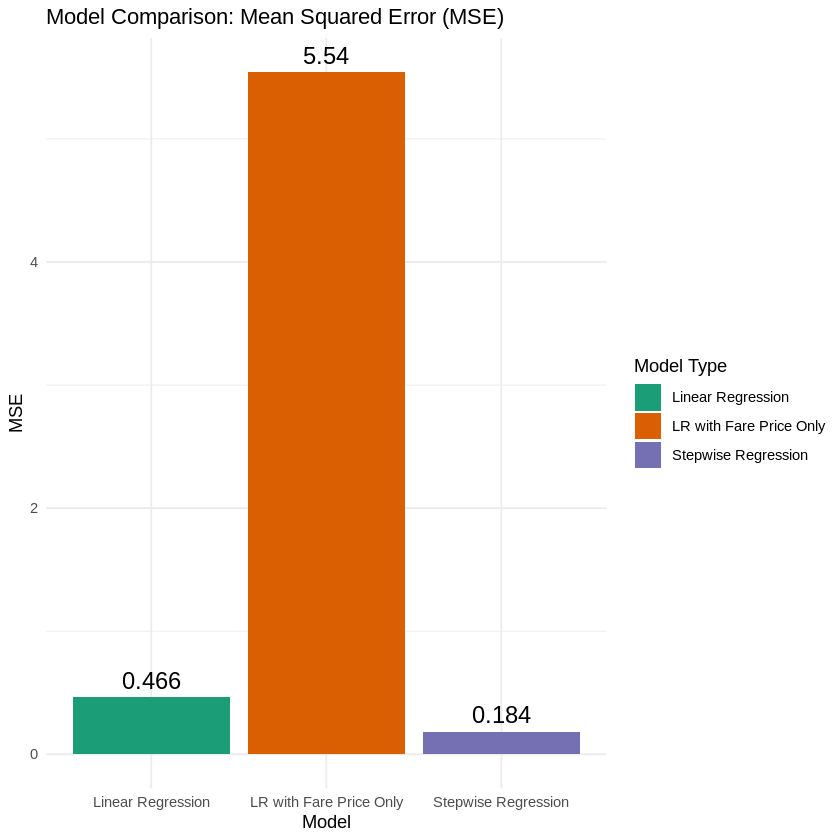

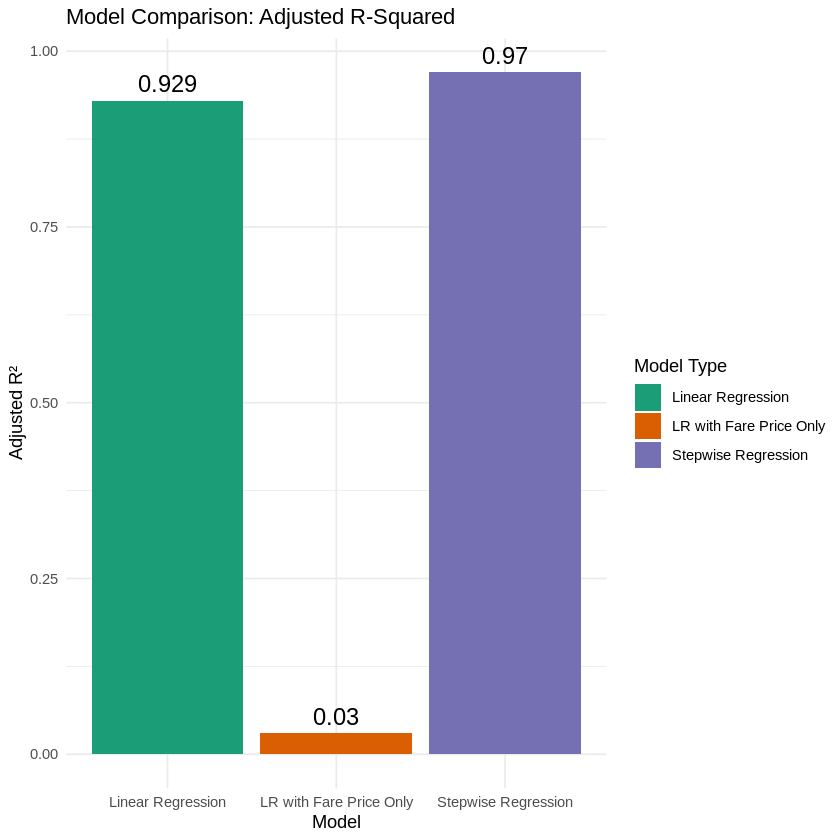

In [50]:
r_table <- data.frame(Model = c("Linear Regression","Stepwise Regression", "LR with Fare Price Only"),
                      MSE = c(lr_mse_test,mse_step, mse_f2),
                      Adjusted_R2 = c(rsq_fmodel,rsq_step, rsq_f2))
#Plot for mse
ggplot(r_table, aes(x = Model, y = MSE, fill = Model)) +
  geom_bar(stat = "identity", show.legend = TRUE) +
  scale_fill_brewer(palette = "Dark2") +
  geom_text(aes(label = round(MSE, 3)), vjust = -0.5, size = 5) + 
  labs(title = "Model Comparison: Mean Squared Error (MSE)", y = "MSE", x = "Model", fill = "Model Type") +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))+
  theme_minimal() 

#Plot for Adjusted R squared Value
ggplot(r_table, aes(x = Model, y = Adjusted_R2, fill = Model)) +
  geom_bar(stat = "identity", show.legend = TRUE) +
  scale_fill_brewer(palette = "Dark2") +
  geom_text(aes(label = round(Adjusted_R2, 3)), vjust = -0.5, size = 5) +  
  labs(title = "Model Comparison: Adjusted R-Squared", y = "Adjusted R²", x = "Model", fill = "Model Type") +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))+
  theme_minimal() 

Awesome, the stepwise model selected a very similar set of factors to those chosen manually, reinforcing the robustness of the selection process. The difference in adjusted R-squared and MSE between the two models is also relatively small, indicating comparable performance.

Stepwise Model Variables: TOS, Mode, Service_Pop, Passenger_Miles, Avg_Trip_Length, Fares, Operating_Expenses, Cost_Per_Trip, Region

Manually Selected Variables (via Dimension Reduction): Operating_Expenses, Avg_Trip_Length, Cost_Per_Trip, Service_Pop, Fare_Per_Trip, Mode

The key differences are: TOS, Passenger_Miles, Fares, Region, and Fare_Per_Trip

Since stepwise regression selects factors that are the most impactful predictors, the strong overlap between both selections supports the facts that Operating_Expenses, Avg_Trip_Length, Cost_Per_Trip, Service_Pop, Fare_Per_Trip, and Mode are not only influential but also reliable predictors of Passenger_Trips/Ridership.

## Rinse and repeat 

Evaluation measures can lead to insights that you can use to redo some of the steps to improve your analysis. Try to interpret the confusion matrices, for example: do FP or FN observations have some things in common? How can you rectify the wrong predictions in training the model? Are there any influential points or outliers that affect the models, etc. 


One thing that I noticed while working with this data is the outliers, and there are quite a lot of them. 
Some of the reason I assume they exist is because of the following:

1)Peak/off-peak hours, special events, or weather conditions: These can cause a lot of fluctuation, irregular spikes, or even drastic dips in transit use.

2)Operation Issues: Strikes or even vehicle breakdowns can lead to unexpected drops in ridership.

3)Data Collection: This data collects transit information from various agencies. These agencies are likely to use different methods in data collection, which can result in many inconsistencies.

4)Uneven Distribution of riders: Stations in City centers tend to have high traffic and, at times, face massive variations, while others become underutilized. 

Some of the steps I have taken to improve the analysis:

To address the wrong predictions, I applied PCA, FA, and Feature importance methods to identify the most impactful predictors and then validated it against a step-wise regression model, which was very beneficial.

Linearity checks were done to examine the relationship between the target variable and predictors, ensuring the chosen model was appropriate for hypothesis testing.

As for outliers, Log transformation was used to improve normality and stabilize variance in key factors. Experimentation was also done using Box-Cox transformation. Both transformations had given similar results, but in the end, I had stuck with the Log transformation. 

I used Shapiro-Wilk and QQ plots as well to check for normality. Unfortunately, a few normality issues persisted despite multiple transformations.

Multicollinearity checks were also done using Variance Inflation Factor (VIF) analysis to ensure predictors were not highly correlated. 
